In [4]:
%matplotlib inline

import pandas as pd
import matplotlib
import json
import matplotlib.pyplot as plt
import psycopg2
import textatistic
import networkx as nx
import seaborn as sbn
import requests
import plotly as py
import numpy as np
matplotlib.style.use('ggplot')
#print(py.__version__) #version 1.9.4 required
py.offline.init_notebook_mode() 

In [5]:
aisles = pd.read_csv('/home/faculty/millbr02/pub/ecomm/aisles.csv')
departments = pd.read_csv('/home/faculty/millbr02/pub/ecomm/departments.csv')
orders =  pd.read_csv('/home/faculty/millbr02/pub/ecomm/orders.csv')
products = pd.read_csv('/home/faculty/millbr02/pub/ecomm/products.csv')
op = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__train.csv')

In [6]:
op.merge(orders, on=['order_id']).merge(products).head()

order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1    816049       49302                  7          1    47901    train   
2   1242203       49302                  1          1     2993    train   
3   1383349       49302                 11          1    41425    train   
4   1787378       49302                  8          0   187205    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             4          4                 10                     9.0   
1            14          4                  6                    16.0   
2            15          0                  7                     7.0   
3             4          3                  8                    14.0   
4             5          4                 14                    30.0   

       product_name  aisle_id  department_id  
0  Bulgarian Yogurt       120             16  
1  Bulgarian Yogurt       120             16  
2  Bulgarian Yogurt       120             16  
3  Bulgarian Yogurt       120             16  
4  Bulgarian Yogurt       120             16

In [7]:
aco = op.groupby('order_id')['add_to_cart_order'].max()
aco = pd.DataFrame(aco)
aco = aco.reset_index()
aco.head()

order_id  add_to_cart_order
0         1                  8
1        36                  8
2        38                  9
3        96                  7
4        98                 49

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fa603b527b8>],
 'cbars': <matplotlib.collections.LineCollection at 0x7fa603b5e160>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fa603b52be0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7fa603b526a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fa603b52e80>}

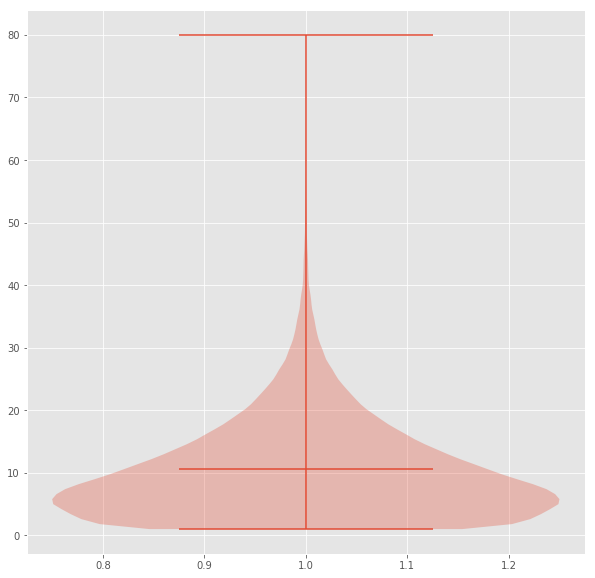

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

axes.violinplot(aco['add_to_cart_order'], showmeans=True, showmedians=False)

(array([  6.84500000e+03,   7.36800000e+03,   8.03300000e+03,
          8.21800000e+03,   0.00000000e+00,   8.89500000e+03,
          8.70800000e+03,   8.54100000e+03,   7.98300000e+03,
          0.00000000e+00,   7.21700000e+03,   6.55300000e+03,
          6.03400000e+03,   5.38300000e+03,   0.00000000e+00,
          4.84300000e+03,   4.39400000e+03,   3.83100000e+03,
          3.52200000e+03,   0.00000000e+00,   3.10800000e+03,
          2.71900000e+03,   2.47300000e+03,   0.00000000e+00,
          2.10200000e+03,   1.85700000e+03,   1.68100000e+03,
          1.46200000e+03,   0.00000000e+00,   1.29200000e+03,
          1.07900000e+03,   9.86000000e+02,   8.60000000e+02,
          0.00000000e+00,   6.79000000e+02,   6.34000000e+02,
          5.53000000e+02,   4.46000000e+02,   0.00000000e+00,
          4.03000000e+02,   3.46000000e+02,   3.15000000e+02,
          0.00000000e+00,   2.80000000e+02,   2.10000000e+02,
          1.93000000e+02,   1.78000000e+02,   0.00000000e+00,
        

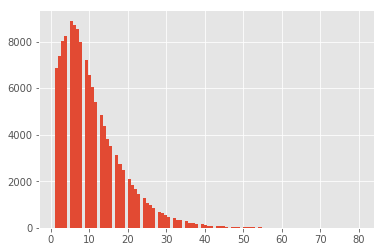

In [9]:
plt.hist(aco['add_to_cart_order'],bins=100)

In [10]:
t= pd.pivot_table(op[op.order_id<50], values=['add_to_cart_order'], index= 'order_id', columns= 'product_id')


In [11]:
t.iloc[1][t.iloc[1].notnull()]

                   product_id
add_to_cart_order  19660         2.0
                   34497         6.0
                   39612         1.0
                   43086         4.0
                   46620         5.0
                   46979         8.0
                   48679         7.0
                   49235         3.0
Name: 36, dtype: float64

In [12]:
t.head()

add_to_cart_order                                                  \
product_id             4461  10246 11109 11913 13176 18159 19660 21616 22035   
order_id                                                                       
1                        NaN   3.0   2.0   NaN   6.0   NaN   NaN   NaN   8.0   
36                       NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   
38                       3.0   NaN   NaN   1.0   NaN   2.0   NaN   4.0   NaN   

                  ...                                                         \
product_id 23622  ...  42625 43086 43633 46620 46979 47209 48679 49235 49302   
order_id          ...                                                          
1            NaN  ...    NaN   NaN   5.0   NaN   NaN   7.0   NaN   NaN   1.0   
36           NaN  ...    NaN   4.0   NaN   5.0   8.0   NaN   7.0   3.0   NaN   
38           5.0  ...    8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  
product_id 49683  
order_id          
1            4.0  
36           NaN  
38           NaN  

[3 rows x 25 columns]

In [13]:
msk = np.random.rand(len(op))< .8
train = op[msk]
test = op[~msk]

In [14]:
print(len(train))
print(len(test))

1108187
276430


In [15]:
aco = train.groupby('order_id')
aco = test.groupby('order_id')

In [16]:
aco.get_group(36)

order_id  product_id  add_to_cart_order  reordered
11        36       43086                  4          1
13        36       34497                  6          1

In [17]:
unique_orderids = aco.groups.keys()

In [18]:
%%time
iimat= {}
for oid in unique_orderids:
    for product1 in aco.get_group(oid)['product_id']:
        if int(product1) not in iimat:
            iimat[int(product1)] = {}
            for product2 in aco.get_group(oid)['product_id']:
                if product1 != product2:
                    iimat[int(product1)][int(product2)]= iimat[int(product1)].get(int(product2),0) +1

CPU times: user 46.9 s, sys: 92 ms, total: 47 s
Wall time: 47 s


In [19]:
%%time
msofar = 0
ones = 0
for key in iimat:
    for i in iimat[key]:
        if iimat[key][i] == 1:
            ones +=1
        if iimat[key][i] > msofar:
            print(key,i,msofar)

1 26348 0
1 37710 0
2 12385 0
2 21137 0
2 25138 0
2 48894 0
2 35121 0
2 30391 0
2 10749 0
2 8174 0
2 45007 0
4 20514 0
7 2154 0
7 46667 0
7 36316 0
8 37642 0
8 34499 0
8 38967 0
9 44085 0
10 14084 0
10 12564 0
10 11512 0
10 12276 0
10 9210 0
10 43086 0
12 41021 0
18 43500 0
18 49054 0
25 36865 0
25 30850 0
25 8309 0
25 21543 0
25 19570 0
25 4297 0
25 22124 0
25 36764 0
25 18465 0
25 31663 0
26 14632 0
28 35072 0
28 9225 0
28 16759 0
29 16349 0
29 43295 0
30 43200 0
30 32700 0
30 35204 0
31 40426 0
31 13850 0
31 18309 0
32 35633 0
32 23375 0
32 7963 0
32 36107 0
32 13629 0
32 8239 0
34 39275 0
35 42585 0
35 11462 0
35 14678 0
36 9315 0
36 33827 0
36 12894 0
38 3104 0
38 22275 0
38 21261 0
40 35898 0
40 32971 0
40 22058 0
40 15902 0
44 22115 0
45 13500 0
45 41658 0
45 8076 0
46 22952 0
46 9829 0
46 47989 0
46 14399 0
47 2344 0
47 44017 0
47 44038 0
47 13166 0
47 23047 0
48 46541 0
48 22959 0
49 21137 0
49 25138 0
49 9076 0
49 13176 0
49 43192 0
49 42557 0
49 23375 0
50 4920 0
53 13176 0


613 2977 0
613 26221 0
614 5456 0
614 6482 0
614 20899 0
614 47766 0
614 43858 0
614 35887 0
617 28289 0
622 5025 0
622 49060 0
622 10350 0
624 43320 0
624 21616 0
624 18370 0
624 27966 0
625 8898 0
625 29758 0
626 15937 0
626 8955 0
626 34358 0
626 7014 0
627 40348 0
628 24852 0
628 16797 0
630 17616 0
630 24699 0
631 38856 0
631 43772 0
632 23441 0
632 16068 0
632 732 0
634 42719 0
635 18432 0
635 33176 0
635 34934 0
635 37654 0
635 40621 0
637 10795 0
637 33198 0
637 40623 0
640 48705 0
640 20691 0
640 27323 0
641 21724 0
641 19604 0
641 31318 0
642 23044 0
642 5684 0
642 41089 0
644 21009 0
644 9554 0
644 33116 0
644 25285 0
644 18719 0
648 39434 0
648 2692 0
648 25575 0
649 14159 0
649 7069 0
649 16797 0
650 44811 0
650 10173 0
650 20246 0
650 37335 0
651 26648 0
651 21513 0
651 36082 0
653 7120 0
653 24184 0
653 29307 0
653 36076 0
653 33735 0
655 16797 0
659 15424 0
659 12702 0
663 27104 0
663 35233 0
663 25108 0
663 31343 0
665 10241 0
665 25154 0
665 18019 0
665 40310 0
665 16

1216 22035 0
1216 43529 0
1216 27531 0
1216 30391 0
1217 17752 0
1217 6473 0
1217 43269 0
1218 47443 0
1221 49520 0
1221 17331 0
1221 9390 0
1221 39558 0
1221 47766 0
1221 46979 0
1221 41950 0
1224 17862 0
1228 25048 0
1228 15097 0
1231 23236 0
1231 5462 0
1232 31915 0
1232 40310 0
1233 43009 0
1233 34449 0
1233 39993 0
1233 28410 0
1233 5818 0
1233 43951 0
1234 12872 0
1234 24852 0
1234 5514 0
1234 24964 0
1234 27639 0
1235 20738 0
1235 8637 0
1235 39757 0
1236 35682 0
1236 12020 0
1236 8424 0
1236 10154 0
1236 7371 0
1236 16797 0
1236 43183 0
1239 24852 0
1239 44926 0
1239 33575 0
1240 15008 0
1240 28785 0
1240 820 0
1240 27142 0
1240 41588 0
1240 28842 0
1240 41787 0
1240 30814 0
1241 43530 0
1241 4335 0
1242 41272 0
1242 14680 0
1242 13237 0
1242 32605 0
1242 10673 0
1244 17668 0
1244 37173 0
1244 39190 0
1244 6649 0
1244 1529 0
1244 17949 0
1249 4656 0
1249 28361 0
1249 12962 0
1249 22260 0
1253 31563 0
1253 45007 0
1253 12381 0
1253 30406 0
1253 1999 0
1256 34898 0
1256 46979 0
1

1839 15820 0
1839 16900 0
1839 34360 0
1841 29574 0
1841 21334 0
1841 39276 0
1841 3243 0
1841 1468 0
1841 19470 0
1843 32689 0
1843 36046 0
1843 6150 0
1843 28007 0
1843 31960 0
1843 10890 0
1843 14634 0
1843 41453 0
1843 12302 0
1843 17615 0
1845 17993 0
1845 11075 0
1845 24097 0
1846 41349 0
1846 18670 0
1848 41729 0
1848 36533 0
1848 26209 0
1848 31960 0
1848 32303 0
1848 39275 0
1848 21288 0
1852 31970 0
1852 35079 0
1853 36393 0
1853 17652 0
1853 49628 0
1853 16797 0
1853 17183 0
1854 5025 0
1854 38548 0
1854 8859 0
1854 27796 0
1854 29935 0
1862 46049 0
1862 39275 0
1866 24654 0
1866 26751 0
1868 28601 0
1868 31196 0
1868 19030 0
1868 41220 0
1868 12817 0
1870 35921 0
1871 264 0
1873 31825 0
1873 30827 0
1873 5750 0
1873 3223 0
1877 28985 0
1877 21170 0
1877 33623 0
1878 20601 0
1878 23787 0
1879 44233 0
1879 15226 0
1879 24964 0
1879 13621 0
1879 8174 0
1880 9104 0
1880 48513 0
1880 6482 0
1880 28099 0
1880 34243 0
1883 26209 0
1883 38682 0
1883 35221 0
1888 35360 0
1890 45504 

2416 1514 0
2416 19836 0
2416 36685 0
2421 23840 0
2421 12312 0
2421 16452 0
2421 26168 0
2421 48874 0
2421 6748 0
2421 1981 0
2421 47630 0
2421 7821 0
2422 41680 0
2422 12817 0
2422 44042 0
2422 12290 0
2422 5566 0
2425 32338 0
2425 17303 0
2426 23644 0
2426 9659 0
2426 45948 0
2428 8048 0
2428 7925 0
2428 37940 0
2428 8501 0
2428 4006 0
2428 17559 0
2428 9387 0
2428 8460 0
2428 15902 0
2428 5077 0
2430 15689 0
2430 19578 0
2430 40063 0
2431 27966 0
2432 17956 0
2432 47492 0
2432 7500 0
2433 2855 0
2434 2772 0
2434 27398 0
2434 13255 0
2435 8424 0
2435 1185 0
2435 34050 0
2437 41665 0
2437 210 0
2437 32566 0
2437 47766 0
2437 48246 0
2437 13176 0
2437 3868 0
2439 21938 0
2439 17206 0
2443 39858 0
2443 10350 0
2443 36471 0
2444 20561 0
2444 26138 0
2444 8460 0
2444 21265 0
2445 13936 0
2445 27313 0
2445 14131 0
2445 22788 0
2445 29646 0
2445 24382 0
2446 31342 0
2447 30489 0
2447 16291 0
2447 43961 0
2448 18027 0
2448 24797 0
2450 26209 0
2450 13829 0
2450 30391 0
2453 47500 0
2453 207

3043 42701 0
3043 12341 0
3044 33129 0
3044 42460 0
3044 27246 0
3044 46126 0
3044 35921 0
3045 9656 0
3045 43554 0
3045 37293 0
3048 21553 0
3048 13866 0
3049 28217 0
3053 1952 0
3055 24850 0
3055 9076 0
3055 40316 0
3055 14536 0
3055 40348 0
3055 14218 0
3055 43789 0
3055 41276 0
3055 16797 0
3055 19037 0
3057 46449 0
3057 43070 0
3057 3039 0
3059 49585 0
3059 40354 0
3059 7156 0
3059 39397 0
3059 4006 0
3059 22890 0
3059 34092 0
3059 10957 0
3059 41870 0
3059 42431 0
3060 20561 0
3060 29250 0
3060 18019 0
3060 22453 0
3060 12087 0
3060 945 0
3060 8536 0
3060 20955 0
3060 32734 0
3061 5120 0
3061 6852 0
3061 7308 0
3061 7116 0
3066 18465 0
3066 43122 0
3066 46886 0
3067 49381 0
3069 49401 0
3069 20303 0
3072 20392 0
3072 28289 0
3072 39182 0
3072 29487 0
3075 13554 0
3075 48925 0
3076 17665 0
3076 44795 0
3076 30924 0
3076 49141 0
3076 34089 0
3077 12381 0
3079 26209 0
3079 25890 0
3079 10305 0
3081 40604 0
3081 6188 0
3082 26587 0
3082 26052 0
3084 37229 0
3085 9804 0
3085 42445 0
3

3708 4931 0
3708 41220 0
3708 16797 0
3708 6287 0
3710 4896 0
3710 21195 0
3710 21999 0
3711 40469 0
3713 24248 0
3713 18234 0
3713 27172 0
3713 33493 0
3713 46654 0
3717 10246 0
3717 41694 0
3721 48210 0
3721 20947 0
3721 14947 0
3721 20119 0
3724 46906 0
3726 6912 0
3726 29697 0
3726 24785 0
3726 47144 0
3726 18285 0
3726 3856 0
3728 43889 0
3728 40706 0
3728 43875 0
3728 45681 0
3728 28985 0
3728 12955 0
3728 14651 0
3728 5550 0
3728 21903 0
3732 2064 0
3732 33696 0
3732 14159 0
3732 23156 0
3732 31541 0
3732 42954 0
3732 30827 0
3732 43772 0
3732 32085 0
3737 16234 0
3737 11710 0
3737 48086 0
3737 24629 0
3738 11408 0
3738 37881 0
3738 20144 0
3740 21872 0
3740 8163 0
3740 18391 0
3741 7736 0
3741 21601 0
3741 17634 0
3741 44867 0
3743 5976 0
3743 45681 0
3743 41373 0
3743 46175 0
3744 47601 0
3744 6213 0
3744 17704 0
3744 19963 0
3744 11182 0
3744 31087 0
3753 27243 0
3753 46842 0
3753 39699 0
3753 40022 0
3754 37766 0
3755 35748 0
3755 9366 0
3756 22227 0
3756 27086 0
3756 15902 

4369 47785 0
4369 20522 0
4369 44635 0
4369 15926 0
4369 19647 0
4372 42768 0
4373 14613 0
4373 33343 0
4373 5818 0
4373 27323 0
4373 29966 0
4373 42431 0
4374 39988 0
4374 47734 0
4377 42633 0
4377 32677 0
4378 32864 0
4378 14050 0
4378 40396 0
4378 3362 0
4386 39032 0
4386 39301 0
4386 34591 0
4387 25668 0
4387 29457 0
4387 28931 0
4387 260 0
4387 10341 0
4387 27398 0
4387 41844 0
4387 13822 0
4388 43392 0
4388 47766 0
4388 3142 0
4388 22935 0
4388 16185 0
4388 47626 0
4388 35163 0
4388 21903 0
4390 8424 0
4390 23169 0
4390 41787 0
4391 9176 0
4391 22675 0
4391 13772 0
4391 758 0
4391 32127 0
4392 24184 0
4392 41065 0
4396 49235 0
4396 15131 0
4396 9532 0
4397 38689 0
4397 42585 0
4397 30391 0
4398 11073 0
4398 9065 0
4399 35004 0
4399 34069 0
4399 44391 0
4401 44632 0
4401 40604 0
4401 24964 0
4405 4920 0
4406 20082 0
4409 33120 0
4409 39619 0
4409 44389 0
4409 26790 0
4409 23001 0
4409 47209 0
4409 35914 0
4409 24830 0
4410 32018 0
4410 11574 0
4410 22935 0
4410 30391 0
4410 24221 

5011 41570 0
5013 17872 0
5013 9762 0
5013 10374 0
5013 31159 0
5013 9394 0
5013 26604 0
5013 34530 0
5014 31881 0
5015 21072 0
5015 26369 0
5015 35188 0
5015 5077 0
5015 5383 0
5015 46906 0
5015 21614 0
5019 5077 0
5020 21137 0
5020 7781 0
5020 14759 0
5021 1062 0
5022 25640 0
5022 39928 0
5022 43122 0
5022 25340 0
5024 5068 0
5024 46676 0
5024 43262 0
5024 48679 0
5025 26209 0
5025 23165 0
5025 48679 0
5027 40136 0
5027 3298 0
5027 23763 0
5027 23157 0
5027 3313 0
5027 21288 0
5027 7546 0
5027 28199 0
5031 27104 0
5031 5825 0
5031 21616 0
5032 43219 0
5033 31334 0
5033 38218 0
5033 47965 0
5033 31134 0
5033 18709 0
5034 38560 0
5035 17462 0
5037 35762 0
5038 35507 0
5041 12524 0
5041 31747 0
5041 14492 0
5042 39500 0
5042 7762 0
5042 24852 0
5042 38374 0
5042 26324 0
5045 38456 0
5045 34969 0
5045 46667 0
5045 39375 0
5045 30639 0
5047 18104 0
5047 19653 0
5047 32917 0
5047 15318 0
5047 18296 0
5047 21131 0
5047 39804 0
5047 5077 0
5050 20995 0
5051 5969 0
5052 9552 0
5054 1529 0
505

5643 5876 0
5643 30391 0
5643 13176 0
5643 39337 0
5643 47546 0
5643 44359 0
5645 43154 0
5646 2825 0
5646 47209 0
5646 5876 0
5646 8518 0
5646 30391 0
5648 9862 0
5649 40604 0
5653 7952 0
5653 32338 0
5653 37158 0
5655 2495 0
5657 39423 0
5658 32156 0
5659 9124 0
5659 15613 0
5659 13541 0
5663 27705 0
5665 18432 0
5665 33700 0
5665 24852 0
5665 49481 0
5665 186 0
5665 13083 0
5665 43100 0
5665 23645 0
5665 29487 0
5668 44765 0
5669 34024 0
5669 25919 0
5669 2015 0
5670 21137 0
5670 40709 0
5670 30949 0
5670 49215 0
5671 40960 0
5671 31889 0
5671 21195 0
5672 6128 0
5672 15131 0
5672 14844 0
5674 25089 0
5674 31562 0
5674 19389 0
5677 32285 0
5677 44910 0
5677 26317 0
5679 6128 0
5679 49235 0
5679 11174 0
5679 47209 0
5679 41950 0
5679 6383 0
5680 26209 0
5680 37766 0
5680 43772 0
5680 45066 0
5680 9020 0
5680 46654 0
5682 27573 0
5683 40348 0
5683 37229 0
5683 25550 0
5684 30489 0
5688 43355 0
5688 43789 0
5688 25157 0
5688 1463 0
5690 30385 0
5690 21603 0
5690 45045 0
5690 38662 0
56

6333 4544 0
6333 29594 0
6333 19366 0
6334 1620 0
6334 21265 0
6334 34370 0
6334 11892 0
6334 24920 0
6334 37940 0
6334 8730 0
6335 5618 0
6335 39877 0
6335 40519 0
6335 44410 0
6335 29628 0
6335 34861 0
6335 5077 0
6336 32717 0
6338 17264 0
6338 21089 0
6338 8584 0
6338 21689 0
6338 3880 0
6341 12953 0
6341 40571 0
6341 44329 0
6341 47209 0
6342 34358 0
6343 31720 0
6343 49609 0
6343 2611 0
6343 22559 0
6344 30169 0
6344 21850 0
6344 15613 0
6347 46045 0
6348 18465 0
6348 44146 0
6348 31973 0
6348 10793 0
6348 47196 0
6348 24382 0
6349 48723 0
6349 27868 0
6349 717 0
6350 5566 0
6352 22882 0
6352 22227 0
6352 1364 0
6352 11688 0
6352 37753 0
6352 21380 0
6352 14778 0
6352 2717 0
6359 43744 0
6360 26209 0
6360 24954 0
6361 47521 0
6361 12892 0
6361 5134 0
6361 12039 0
6367 17264 0
6367 17986 0
6367 5603 0
6367 1069 0
6367 49191 0
6369 43409 0
6369 10308 0
6369 41783 0
6369 15124 0
6369 2538 0
6369 29487 0
6373 34584 0
6373 7474 0
6373 46723 0
6373 2597 0
6374 42731 0
6374 20860 0
6375 

7057 18200 0
7058 10504 0
7058 42265 0
7058 21162 0
7058 26324 0
7058 5077 0
7064 33153 0
7064 10355 0
7067 47900 0
7067 5876 0
7067 46900 0
7067 20382 0
7067 24561 0
7069 1266 0
7069 46522 0
7069 34887 0
7075 1704 0
7075 2081 0
7075 36082 0
7075 38739 0
7075 19906 0
7079 27521 0
7079 26453 0
7079 35221 0
7083 4942 0
7083 41351 0
7084 27521 0
7084 22025 0
7084 248 0
7084 30489 0
7084 28842 0
7084 48442 0
7084 43999 0
7087 29487 0
7088 49235 0
7089 42768 0
7089 6104 0
7089 40836 0
7090 44560 0
7090 47817 0
7090 25830 0
7091 47209 0
7091 42613 0
7091 30117 0
7091 36550 0
7091 27511 0
7095 5652 0
7095 17795 0
7095 46979 0
7095 5134 0
7095 27695 0
7101 8400 0
7101 31850 0
7101 43772 0
7101 12738 0
7103 38679 0
7111 35336 0
7111 5475 0
7113 35461 0
7113 13870 0
7113 5646 0
7113 1695 0
7114 2876 0
7114 11671 0
7116 21616 0
7116 39275 0
7116 36316 0
7116 23909 0
7116 16518 0
7118 35376 0
7118 36065 0
7120 19173 0
7120 8654 0
7120 19535 0
7123 33493 0
7123 2566 0
7126 2481 0
7126 11366 0
7134 

7805 16759 0
7805 46408 0
7805 44410 0
7805 48205 0
7806 14651 0
7806 4781 0
7807 11185 0
7807 14131 0
7807 37364 0
7807 30183 0
7807 40616 0
7807 7628 0
7807 31981 0
7807 5710 0
7807 29487 0
7808 5520 0
7808 10768 0
7808 31578 0
7815 13249 0
7815 27706 0
7815 40701 0
7815 37158 0
7815 29681 0
7816 11520 0
7816 34658 0
7816 2086 0
7819 43568 0
7819 13909 0
7819 33206 0
7819 18761 0
7819 43978 0
7819 44234 0
7819 44142 0
7819 23341 0
7821 23840 0
7821 12312 0
7821 16452 0
7821 2421 0
7821 26168 0
7821 48874 0
7821 6748 0
7821 1981 0
7821 47630 0
7825 9755 0
7825 1405 0
7825 32047 0
7827 19138 0
7827 17716 0
7827 47766 0
7827 27596 0
7827 20701 0
7827 33454 0
7828 25825 0
7828 40516 0
7828 39485 0
7828 25783 0
7830 40427 0
7830 33543 0
7834 14058 0
7834 49235 0
7835 47672 0
7835 36550 0
7836 49622 0
7837 8424 0
7837 1614 0
7837 29487 0
7838 23410 0
7838 18507 0
7838 43860 0
7838 38341 0
7842 24009 0
7842 40229 0
7842 5015 0
7845 48386 0
7845 8475 0
7847 49680 0
7847 42849 0
7847 5259 0
7

8414 19516 0
8414 42174 0
8418 31506 0
8418 13076 0
8418 24852 0
8418 20842 0
8418 33106 0
8418 27086 0
8418 12157 0
8421 44753 0
8421 48595 0
8421 41950 0
8421 47526 0
8421 20843 0
8421 21134 0
8423 33548 0
8423 24852 0
8423 33791 0
8424 11777 0
8425 2855 0
8428 960 0
8428 29122 0
8429 17872 0
8429 11136 0
8429 21938 0
8429 25588 0
8429 42213 0
8429 15512 0
8429 36441 0
8429 890 0
8429 18027 0
8431 22515 0
8431 47029 0
8431 3453 0
8433 41508 0
8433 18187 0
8433 15364 0
8433 24117 0
8433 27966 0
8434 42633 0
8434 20842 0
8434 45549 0
8436 13176 0
8436 32665 0
8437 34035 0
8440 1360 0
8440 10373 0
8440 37031 0
8440 44104 0
8440 37658 0
8440 35079 0
8446 424 0
8446 41064 0
8446 14371 0
8446 35045 0
8446 2966 0
8446 39928 0
8446 1468 0
8446 42828 0
8446 16797 0
8448 5720 0
8448 35131 0
8448 21227 0
8448 26629 0
8449 13536 0
8449 38028 0
8449 19759 0
8451 21137 0
8451 35721 0
8452 48144 0
8452 32684 0
8452 44622 0
8452 2966 0
8452 21462 0
8456 17835 0
8456 38997 0
8456 37173 0
8459 34744 0

9162 39783 0
9162 35176 0
9162 20345 0
9162 11819 0
9162 29263 0
9163 5867 0
9163 46131 0
9163 17982 0
9163 25783 0
9164 2033 0
9164 34202 0
9164 4443 0
9164 6300 0
9166 24235 0
9168 19894 0
9170 13945 0
9170 37115 0
9170 23723 0
9170 12606 0
9171 34448 0
9171 18370 0
9171 16617 0
9171 29722 0
9171 36923 0
9171 48364 0
9171 5194 0
9171 9839 0
9175 24852 0
9175 44037 0
9175 21447 0
9175 33452 0
9175 20156 0
9175 48205 0
9175 31981 0
9176 4391 0
9176 22675 0
9176 13772 0
9176 758 0
9176 32127 0
9177 28849 0
9177 27730 0
9177 28851 0
9177 148 0
9177 10305 0
9177 38164 0
9177 16797 0
9178 26850 0
9178 1511 0
9178 40709 0
9178 8309 0
9178 42719 0
9182 14992 0
9182 29256 0
9182 25122 0
9182 44310 0
9182 10246 0
9182 17944 0
9182 37307 0
9182 42701 0
9182 3166 0
9182 16797 0
9186 6873 0
9186 5618 0
9186 38419 0
9186 36117 0
9186 5959 0
9189 42265 0
9189 35951 0
9191 4137 0
9191 5077 0
9192 21938 0
9192 26477 0
9192 1365 0
9194 28834 0
9194 46584 0
9194 39561 0
9194 15322 0
9194 8012 0
9194 25

9969 3466 0
9972 45681 0
9973 3856 0
9973 38620 0
9976 38739 0
9976 43867 0
9980 14104 0
9980 14233 0
9980 32691 0
9996 24184 0
9996 27796 0
9996 27288 0
9996 7628 0
9996 44234 0
9996 38940 0
9996 24830 0
9998 24768 0
10001 12384 0
10001 21169 0
10001 27796 0
10001 3957 0
10001 8671 0
10001 19557 0
10001 16589 0
10001 39877 0
10005 34786 0
10005 44596 0
10005 10089 0
10005 26201 0
10005 28535 0
10005 41950 0
10006 47766 0
10006 43086 0
10006 27966 0
10008 28458 0
10008 9076 0
10008 38693 0
10008 45007 0
10009 17409 0
10009 17306 0
10009 43107 0
10009 37097 0
10011 28465 0
10011 36322 0
10011 29268 0
10011 35535 0
10017 25890 0
10017 47766 0
10022 41276 0
10023 45104 0
10023 16042 0
10025 44632 0
10025 30639 0
10026 48290 0
10026 30391 0
10026 29487 0
10029 7736 0
10029 5025 0
10029 13966 0
10029 34287 0
10035 13176 0
10035 22825 0
10036 2923 0
10036 20738 0
10036 49555 0
10036 94 0
10038 25142 0
10048 26209 0
10048 19049 0
10049 26312 0
10049 31461 0
10049 37262 0
10049 12015 0
10053 3

10448 43446 0
10450 25403 0
10453 33745 0
10453 11563 0
10453 18414 0
10455 28289 0
10455 4562 0
10455 3579 0
10455 21269 0
10455 19982 0
10455 37625 0
10455 31915 0
10455 34034 0
10455 20382 0
10455 35951 0
10460 27761 0
10460 41714 0
10460 25316 0
10460 45465 0
10460 46473 0
10460 47626 0
10460 45771 0
10463 5136 0
10463 30353 0
10463 4966 0
10463 42033 0
10466 16464 0
10466 5114 0
10466 32691 0
10466 48004 0
10466 21333 0
10466 4778 0
10466 40028 0
10466 47357 0
10466 26510 0
10466 24749 0
10467 28016 0
10467 196 0
10467 48206 0
10467 41290 0
10467 9852 0
10467 30830 0
10469 18880 0
10469 626 0
10469 11974 0
10469 44359 0
10469 42669 0
10469 34126 0
10469 48109 0
10470 41391 0
10476 46667 0
10476 24830 0
10477 5785 0
10477 47626 0
10477 42811 0
10478 44666 0
10478 32139 0
10478 27356 0
10479 28204 0
10481 16747 0
10481 18389 0
10482 16415 0
10489 15176 0
10489 36106 0
10490 24097 0
10490 45349 0
10491 13323 0
10491 19204 0
10491 22141 0
10492 38944 0
10492 20776 0
10492 7156 0
10492

11190 46057 0
11193 19660 0
11193 2966 0
11193 33198 0
11193 16797 0
11194 34024 0
11194 19906 0
11194 46979 0
11194 15700 0
11194 24184 0
11194 19691 0
11194 4210 0
11195 11777 0
11195 14371 0
11195 581 0
11195 37067 0
11195 1998 0
11195 33055 0
11196 42667 0
11196 29843 0
11196 24703 0
11197 42265 0
11197 7751 0
11198 26194 0
11199 4920 0
11199 10017 0
11199 26620 0
11199 21709 0
11199 47766 0
11202 12545 0
11202 45123 0
11202 38180 0
11202 34966 0
11202 12758 0
11202 35977 0
11202 9534 0
11202 39519 0
11203 43545 0
11203 21267 0
11203 10348 0
11203 25837 0
11203 5653 0
11209 3577 0
11212 15427 0
11212 12820 0
11213 20120 0
11215 20659 0
11215 35221 0
11215 48118 0
11215 34407 0
11215 26312 0
11215 26572 0
11218 21497 0
11218 28431 0
11222 41168 0
11222 967 0
11223 14780 0
11224 28745 0
11225 17600 0
11225 26209 0
11225 36322 0
11225 9366 0
11225 45007 0
11229 39107 0
11229 48078 0
11229 29487 0
11233 20776 0
11233 38739 0
11238 33000 0
11238 32912 0
11238 37066 0
11247 29487 0
11247

11662 44752 0
11662 30391 0
11665 15153 0
11665 24004 0
11665 6341 0
11665 27800 0
11665 11676 0
11665 43085 0
11668 6974 0
11668 14197 0
11668 2102 0
11668 24010 0
11668 28939 0
11668 27966 0
11669 248 0
11669 39877 0
11671 7114 0
11671 2876 0
11672 3142 0
11673 46654 0
11676 15153 0
11676 24004 0
11676 6341 0
11676 11665 0
11676 27800 0
11676 43085 0
11678 21586 0
11678 11163 0
11678 15820 0
11678 49605 0
11679 29251 0
11679 28229 0
11679 20902 0
11679 16953 0
11679 39352 0
11679 8460 0
11679 9020 0
11683 39032 0
11683 28322 0
11683 39891 0
11683 43714 0
11683 5713 0
11683 48440 0
11683 12218 0
11683 23341 0
11683 13087 0
11686 29664 0
11686 48548 0
11686 47141 0
11686 34550 0
11686 27086 0
11686 12916 0
11686 30669 0
11686 45190 0
11687 8260 0
11687 45290 0
11687 20171 0
11687 19468 0
11687 28990 0
11688 19548 0
11688 28542 0
11689 16223 0
11689 8501 0
11689 47865 0
11689 16920 0
11689 42633 0
11689 47626 0
11689 17151 0
11689 26348 0
11689 35221 0
11689 43903 0
11691 26209 0
11691 

12057 7503 0
12058 4472 0
12058 6489 0
12058 8277 0
12058 47766 0
12058 8615 0
12060 26369 0
12060 24964 0
12060 12732 0
12060 36389 0
12062 45061 0
12065 881 0
12065 34834 0
12065 4662 0
12065 3529 0
12065 16890 0
12065 34060 0
12065 14338 0
12066 16257 0
12066 28158 0
12069 13176 0
12069 43014 0
12069 10749 0
12069 27966 0
12069 45623 0
12070 2962 0
12070 26283 0
12070 17836 0
12070 42117 0
12070 47766 0
12072 13636 0
12074 20634 0
12074 5782 0
12075 24373 0
12075 10246 0
12075 49191 0
12078 9076 0
12078 12732 0
12080 6197 0
12081 20137 0
12082 41306 0
12082 10060 0
12083 35353 0
12083 34222 0
12083 41383 0
12086 7912 0
12086 20937 0
12087 24097 0
12087 35042 0
12087 49605 0
12087 39190 0
12087 46023 0
12087 8584 0
12087 10646 0
12087 30875 0
12087 10508 0
12087 20877 0
12089 25824 0
12089 2180 0
12089 24838 0
12089 10761 0
12089 42265 0
12089 9534 0
12094 30057 0
12094 43658 0
12094 22395 0
12094 45116 0
12094 32446 0
12099 21108 0
12099 24852 0
12100 21938 0
12100 7948 0
12100 3599

12467 34430 0
12469 43194 0
12474 34355 0
12474 17874 0
12474 43227 0
12474 14639 0
12478 40706 0
12478 4614 0
12480 28842 0
12480 17461 0
12480 3583 0
12488 36016 0
12488 31553 0
12488 17122 0
12488 49025 0
12488 48364 0
12488 32095 0
12491 26113 0
12491 19003 0
12491 49118 0
12492 13176 0
12493 17532 0
12493 15869 0
12495 33649 0
12495 18999 0
12496 41272 0
12496 14265 0
12496 24852 0
12496 14161 0
12496 22017 0
12499 24954 0
12499 42701 0
12500 3840 0
12504 22688 0
12504 43744 0
12504 49026 0
12504 23579 0
12505 13740 0
12505 3661 0
12505 14126 0
12506 47353 0
12506 4532 0
12506 6245 0
12506 11233 0
12508 46417 0
12508 49474 0
12511 6550 0
12511 32519 0
12513 16953 0
12513 19348 0
12513 30845 0
12513 14111 0
12515 39928 0
12515 11636 0
12515 1938 0
12515 15547 0
12515 24852 0
12516 7881 0
12516 27102 0
12519 45066 0
12519 35123 0
12519 49239 0
12521 47977 0
12521 48811 0
12521 29646 0
12521 34862 0
12521 30863 0
12524 15820 0
12528 20248 0
12528 21472 0
12528 20674 0
12528 9829 0
12

12882 13176 0
12882 5258 0
12882 3631 0
12884 32684 0
12885 24333 0
12887 14147 0
12887 15842 0
12887 30627 0
12887 21554 0
12888 13176 0
12888 43789 0
12888 34126 0
12888 33215 0
12889 42944 0
12889 46720 0
12889 47766 0
12889 22825 0
12889 45866 0
12889 37067 0
12889 15872 0
12891 12320 0
12891 30865 0
12891 40706 0
12891 44912 0
12891 10998 0
12891 35383 0
12891 49236 0
12891 13431 0
12891 26764 0
12891 12206 0
12891 21903 0
12892 47521 0
12892 12039 0
12892 5134 0
12892 6361 0
12896 48075 0
12896 47990 0
12898 24852 0
12898 32734 0
12898 49287 0
12899 40120 0
12899 6184 0
12902 21449 0
12902 16539 0
12902 24852 0
12902 1700 0
12905 22872 0
12905 38479 0
12906 49235 0
12906 46979 0
12906 2806 0
12909 6998 0
12910 42768 0
12910 10874 0
12911 1685 0
12911 11590 0
12914 41290 0
12916 27730 0
12916 13579 0
12916 41013 0
12916 7930 0
12916 44415 0
12918 45541 0
12918 13654 0
12918 31720 0
12918 22937 0
12918 7644 0
12918 18351 0
12919 47977 0
12919 1831 0
12919 26055 0
12920 41056 0
1292

13311 20512 0
13311 25154 0
13311 7723 0
13311 516 0
13311 31769 0
13311 36664 0
13311 21737 0
13311 38714 0
13311 27275 0
13311 31196 0
13311 20082 0
13313 27147 0
13314 46749 0
13314 19006 0
13314 11815 0
13318 37729 0
13318 12771 0
13319 17825 0
13319 34898 0
13319 12069 0
13319 39032 0
13319 10473 0
13319 15404 0
13319 37826 0
13319 6623 0
13322 19620 0
13323 10491 0
13323 19204 0
13323 22141 0
13326 21100 0
13326 19863 0
13328 8988 0
13328 29526 0
13329 10070 0
13332 26604 0
13333 10049 0
13333 15876 0
13333 33109 0
13337 2481 0
13337 31789 0
13337 32047 0
13338 34050 0
13338 15579 0
13339 47626 0
13339 8518 0
13339 47766 0
13339 22935 0
13340 33764 0
13340 33620 0
13340 2078 0
13340 27966 0
13340 24852 0
13343 41731 0
13343 15924 0
13346 39040 0
13346 16210 0
13346 35510 0
13346 22825 0
13346 37838 0
13346 4367 0
13350 26431 0
13358 15057 0
13360 32825 0
13360 36266 0
13360 41148 0
13360 26346 0
13360 5097 0
13363 20084 0
13363 4591 0
13363 20628 0
13363 29270 0
13363 23537 0
133

13774 8021 0
13774 25305 0
13774 36698 0
13774 16908 0
13774 16730 0
13775 3243 0
13775 39276 0
13775 31471 0
13776 46969 0
13776 35628 0
13776 31533 0
13776 17862 0
13776 47229 0
13779 11777 0
13779 23025 0
13779 9092 0
13779 38456 0
13779 39977 0
13780 21759 0
13782 42536 0
13782 9687 0
13790 35221 0
13790 5782 0
13793 13176 0
13793 23953 0
13795 34050 0
13795 26346 0
13795 4031 0
13802 12196 0
13802 27845 0
13802 7559 0
13803 31683 0
13805 31662 0
13805 31267 0
13805 18765 0
13805 19318 0
13805 30391 0
13807 2344 0
13807 18657 0
13807 16278 0
13807 15950 0
13807 45221 0
13808 42768 0
13808 26128 0
13808 20995 0
13808 1713 0
13813 18792 0
13813 28696 0
13813 5031 0
13814 16965 0
13817 18618 0
13817 43980 0
13819 5479 0
13820 32303 0
13822 9953 0
13822 23645 0
13822 28630 0
13822 22935 0
13825 5315 0
13825 24908 0
13826 1409 0
13826 34466 0
13826 41950 0
13826 25718 0
13826 7090 0
13827 16953 0
13827 25706 0
13827 47357 0
13827 46485 0
13829 21938 0
13829 43295 0
13830 34619 0
13830 3

14231 22124 0
14231 34557 0
14231 47792 0
14231 49683 0
14231 9076 0
14231 8277 0
14231 31766 0
14231 43352 0
14231 32284 0
14231 24499 0
14233 25504 0
14238 36664 0
14238 43248 0
14238 15322 0
14238 6686 0
14238 37358 0
14239 1514 0
14239 16020 0
14239 25407 0
14240 11576 0
14240 27344 0
14240 37511 0
14242 19057 0
14242 29987 0
14242 34126 0
14242 30391 0
14242 11352 0
14242 39180 0
14242 26209 0
14242 33731 0
14243 17341 0
14252 39465 0
14252 4895 0
14254 38672 0
14254 34234 0
14254 33548 0
14254 31231 0
14256 47209 0
14256 14129 0
14256 44487 0
14257 39408 0
14257 38689 0
14257 41290 0
14257 46979 0
14257 31231 0
14260 37307 0
14260 8903 0
14261 14444 0
14261 9694 0
14265 41272 0
14265 22017 0
14265 24852 0
14265 12496 0
14265 14161 0
14266 4824 0
14266 28985 0
14266 26604 0
14267 19548 0
14268 37940 0
14268 20570 0
14268 20156 0
14268 9901 0
14268 46023 0
14269 28199 0
14270 14147 0
14270 20591 0
14270 45069 0
14270 8029 0
14271 46616 0
14271 38164 0
14275 4448 0
14275 21137 0
142

14612 24291 0
14612 5834 0
14613 42431 0
14613 4373 0
14613 5818 0
14613 27323 0
14613 29966 0
14613 33343 0
14616 42352 0
14616 16419 0
14618 26209 0
14618 33754 0
14618 40571 0
14620 45066 0
14623 32299 0
14623 806 0
14624 46221 0
14627 15386 0
14627 23836 0
14627 34466 0
14627 39558 0
14632 26 0
14633 20632 0
14633 39922 0
14634 32689 0
14634 1843 0
14634 36046 0
14634 6150 0
14634 28007 0
14634 31960 0
14634 10890 0
14634 41453 0
14634 12302 0
14634 17615 0
14636 47185 0
14636 44562 0
14636 17862 0
14636 4966 0
14636 32455 0
14636 33754 0
14636 5020 0
14636 27370 0
14639 34355 0
14639 17874 0
14639 43227 0
14639 12474 0
14641 20754 0
14641 4659 0
14641 7283 0
14641 28934 0
14641 37687 0
14641 44632 0
14641 45865 0
14641 39180 0
14641 21709 0
14642 768 0
14642 27521 0
14642 45603 0
14643 3952 0
14643 40706 0
14643 581 0
14643 18583 0
14643 48697 0
14643 5450 0
14643 16570 0
14647 42938 0
14647 19966 0
14649 21137 0
14649 7778 0
14649 25298 0
14649 6328 0
14649 3689 0
14649 26604 0
1

14973 44952 0
14973 27104 0
14973 45891 0
14973 24142 0
14973 20191 0
14974 14302 0
14976 6297 0
14976 40002 0
14976 43643 0
14976 40604 0
14976 39990 0
14977 19068 0
14977 2596 0
14977 47766 0
14979 11759 0
14979 21903 0
14985 37307 0
14986 39249 0
14986 38739 0
14986 49605 0
14986 22935 0
14986 48455 0
14986 19519 0
14992 3339 0
14992 4781 0
14992 10749 0
14996 22384 0
14996 44683 0
14996 5902 0
14999 47144 0
14999 35221 0
14999 48559 0
15000 31506 0
15000 21484 0
15003 37722 0
15003 47519 0
15004 18850 0
15005 47626 0
15006 13237 0
15008 28785 0
15008 820 0
15008 27142 0
15008 1240 0
15008 41588 0
15008 28842 0
15008 41787 0
15008 30814 0
15010 21472 0
15010 20114 0
15010 6187 0
15010 24852 0
15010 31422 0
15011 43789 0
15011 13646 0
15012 23296 0
15012 19984 0
15012 34358 0
15012 2118 0
15012 2232 0
15012 47865 0
15012 38747 0
15012 31981 0
15012 16696 0
15014 15984 0
15014 38275 0
15014 48679 0
15014 4305 0
15014 25931 0
15014 18382 0
15014 43760 0
15014 28785 0
15014 42625 0
1501

15355 26209 0
15356 34284 0
15356 23517 0
15356 35887 0
15357 18105 0
15357 24964 0
15357 24852 0
15357 43789 0
15357 25636 0
15359 5734 0
15362 38186 0
15363 432 0
15363 33129 0
15363 782 0
15363 13249 0
15364 45889 0
15364 37634 0
15364 38415 0
15364 18382 0
15364 5183 0
15366 37141 0
15366 44661 0
15366 47734 0
15366 43967 0
15369 6193 0
15369 24253 0
15370 13984 0
15370 39812 0
15370 20734 0
15370 13166 0
15374 18811 0
15374 41844 0
15374 8025 0
15374 7641 0
15374 18987 0
15374 45535 0
15377 14218 0
15377 18340 0
15377 45066 0
15377 38557 0
15380 39275 0
15380 18142 0
15380 36206 0
15383 18234 0
15383 5876 0
15383 28842 0
15383 32605 0
15386 34466 0
15386 14627 0
15386 23836 0
15386 39558 0
15390 17615 0
15390 32455 0
15391 11777 0
15391 14124 0
15391 16165 0
15392 5621 0
15395 18125 0
15396 6046 0
15396 46359 0
15397 14084 0
15397 46886 0
15397 26921 0
15397 37674 0
15397 49260 0
15397 47629 0
15397 27086 0
15397 13740 0
15397 7753 0
15397 26683 0
15397 41596 0
15397 5194 0
15397 

15721 29409 0
15721 38669 0
15724 47514 0
15724 33515 0
15724 21091 0
15724 4578 0
15724 18686 0
15727 33000 0
15727 47652 0
15727 22525 0
15734 45064 0
15734 44251 0
15739 38714 0
15741 44704 0
15741 10957 0
15741 22782 0
15746 41169 0
15747 35430 0
15747 34862 0
15747 38902 0
15747 43565 0
15752 2539 0
15752 41950 0
15755 34786 0
15755 24852 0
15758 43352 0
15758 22825 0
15758 13776 0
15758 27115 0
15758 26604 0
15759 22128 0
15759 29284 0
15759 45318 0
15759 37113 0
15759 22650 0
15759 763 0
15759 44813 0
15760 16797 0
15763 26209 0
15763 27695 0
15764 43768 0
15764 8362 0
15764 36685 0
15765 22890 0
15766 20842 0
15766 43772 0
15766 38690 0
15767 25634 0
15767 25842 0
15769 3099 0
15769 45091 0
15769 45310 0
15769 26518 0
15770 45185 0
15770 49381 0
15770 23909 0
15770 9176 0
15770 14505 0
15770 49306 0
15770 20156 0
15770 15820 0
15770 18573 0
15772 14168 0
15772 15100 0
15772 25806 0
15776 35560 0
15776 3522 0
15776 6550 0
15776 15359 0
15777 43491 0
15777 16349 0
15777 29487 0
1

16428 30162 0
16428 41787 0
16428 35293 0
16428 47573 0
16430 25146 0
16432 29473 0
16432 44310 0
16432 46049 0
16432 16748 0
16432 16254 0
16432 48559 0
16434 19650 0
16434 9411 0
16434 39620 0
16434 23241 0
16434 28459 0
16434 27471 0
16436 30744 0
16436 5938 0
16436 10084 0
16436 38054 0
16436 21511 0
16439 24369 0
16440 33613 0
16441 42216 0
16441 20995 0
16446 5337 0
16446 27930 0
16446 42315 0
16447 11495 0
16450 38456 0
16450 25466 0
16450 26242 0
16451 30192 0
16451 3233 0
16451 19436 0
16451 27061 0
16451 4957 0
16452 23840 0
16452 12312 0
16452 2421 0
16452 26168 0
16452 48874 0
16452 6748 0
16452 1981 0
16452 47630 0
16452 7821 0
16454 28934 0
16454 37630 0
16456 11888 0
16456 14257 0
16456 9138 0
16456 34168 0
16456 5692 0
16456 44734 0
16459 18673 0
16460 27344 0
16460 16953 0
16460 9390 0
16460 30678 0
16460 45007 0
16462 21903 0
16462 22035 0
16462 12276 0
16462 27695 0
16464 27761 0
16464 10613 0
16464 6518 0
16464 39041 0
16464 17878 0
16464 36425 0
16464 26250 0
16464

16797 13535 0
16797 24852 0
16797 28849 0
16798 24838 0
16799 47329 0
16803 14164 0
16803 5782 0
16803 47672 0
16803 11773 0
16803 34798 0
16803 19647 0
16805 18594 0
16805 31076 0
16805 13854 0
16808 13870 0
16808 18599 0
16808 48395 0
16808 30492 0
16808 34525 0
16808 27086 0
16808 30391 0
16813 15712 0
16813 45603 0
16813 49683 0
16813 15925 0
16813 47766 0
16813 22935 0
16813 15464 0
16813 41178 0
16813 27179 0
16815 49235 0
16815 46627 0
16815 40676 0
16815 45578 0
16815 2604 0
16815 35343 0
16818 33614 0
16820 14424 0
16820 46842 0
16820 44843 0
16820 31087 0
16823 32433 0
16823 43014 0
16823 13431 0
16823 9049 0
16823 5450 0
16823 31371 0
16824 13166 0
16825 46997 0
16825 1406 0
16826 32864 0
16826 21709 0
16827 2604 0
16827 46847 0
16830 43340 0
16834 17400 0
16834 5764 0
16834 26756 0
16834 5025 0
16837 47953 0
16837 32360 0
16837 47209 0
16837 29307 0
16837 4508 0
16837 14332 0
16837 25471 0
16839 21616 0
16839 30776 0
16839 20995 0
16839 5015 0
16839 13176 0
16839 10476 0
16

17572 47520 0
17572 31506 0
17572 39108 0
17572 16747 0
17572 2604 0
17572 24079 0
17573 21936 0
17573 25476 0
17573 46167 0
17574 39132 0
17574 44710 0
17576 26348 0
17576 26119 0
17576 40889 0
17576 27547 0
17576 20156 0
17576 25084 0
17576 42719 0
17576 43183 0
17579 30962 0
17579 14678 0
17579 6104 0
17579 32201 0
17579 3599 0
17579 34557 0
17579 21903 0
17580 21847 0
17580 3835 0
17580 26165 0
17580 47719 0
17580 39977 0
17580 19627 0
17580 30941 0
17580 37646 0
17581 25340 0
17581 31645 0
17581 27966 0
17583 27104 0
17583 18433 0
17583 45156 0
17583 47521 0
17583 41290 0
17583 2855 0
17583 7695 0
17583 42768 0
17583 12145 0
17583 42450 0
17583 31288 0
17583 1818 0
17584 35640 0
17590 21040 0
17592 21137 0
17592 11090 0
17592 24948 0
17592 19156 0
17592 24954 0
17592 11005 0
17592 8174 0
17592 45007 0
17594 31040 0
17594 38739 0
17594 24184 0
17594 46979 0
17594 34861 0
17594 41294 0
17594 45007 0
17604 26756 0
17604 17956 0
17604 2822 0
17605 21417 0
17605 10662 0
17605 17191 0
1

17952 4920 0
17952 32440 0
17952 45589 0
17952 35096 0
17953 23622 0
17956 42736 0
17956 39812 0
17964 22384 0
17964 35000 0
17964 35224 0
17964 40723 0
17964 13176 0
17964 17948 0
17964 3661 0
17965 6724 0
17965 39332 0
17965 2390 0
17965 5020 0
17965 46692 0
17965 12538 0
17965 6348 0
17966 41844 0
17968 35619 0
17969 34625 0
17969 6184 0
17969 24184 0
17969 13772 0
17969 16349 0
17969 28733 0
17971 27845 0
17971 12846 0
17976 30720 0
17976 30777 0
17976 3298 0
17976 10310 0
17976 40199 0
17979 37065 0
17979 47333 0
17980 47209 0
17980 8239 0
17981 44548 0
17982 9387 0
17982 25146 0
17982 24427 0
17982 7533 0
17982 32621 0
17985 25976 0
17985 39647 0
17988 19048 0
17988 36011 0
17988 46900 0
17988 1999 0
17993 30425 0
17993 4663 0
17993 30073 0
17993 23418 0
17993 47516 0
17993 16797 0
17997 5024 0
17997 3376 0
17997 30391 0
18000 43961 0
18004 33331 0
18004 30756 0
18004 38510 0
18004 12919 0
18004 20682 0
18004 35756 0
18004 5118 0
18009 43352 0
18009 27865 0
18009 38371 0
18010 21

18708 16797 0
18708 27966 0
18708 38200 0
18709 10240 0
18709 40261 0
18713 196 0
18713 20868 0
18716 25931 0
18716 33132 0
18716 34862 0
18718 34353 0
18718 8021 0
18718 41806 0
18718 17025 0
18719 21009 0
18719 9554 0
18719 644 0
18719 33116 0
18719 25285 0
18721 43781 0
18725 26073 0
18727 48104 0
18727 31338 0
18727 44359 0
18727 19613 0
18727 21903 0
18740 49520 0
18740 26209 0
18740 29941 0
18740 23029 0
18740 30391 0
18740 30169 0
18740 21903 0
18740 40268 0
18740 27695 0
18747 27360 0
18747 42731 0
18747 10078 0
18749 15264 0
18749 6522 0
18749 23803 0
18751 17631 0
18752 12212 0
18752 20114 0
18752 32691 0
18752 1940 0
18752 28217 0
18752 27609 0
18752 3434 0
18752 44359 0
18752 8479 0
18755 3903 0
18755 46611 0
18755 5315 0
18755 6550 0
18755 25546 0
18755 2079 0
18755 49247 0
18757 11456 0
18757 37170 0
18757 27102 0
18757 17080 0
18757 37066 0
18757 20156 0
18757 49306 0
18757 44318 0
18760 5825 0
18761 48679 0
18762 2679 0
18765 47231 0
18765 45007 0
18765 42110 0
18765 98

19144 48278 0
19144 48423 0
19146 22276 0
19146 5373 0
19149 46667 0
19149 8277 0
19151 49620 0
19151 9300 0
19151 15612 0
19154 24954 0
19155 5385 0
19155 41877 0
19155 8479 0
19156 33489 0
19156 16185 0
19156 16521 0
19156 20011 0
19156 26369 0
19156 23821 0
19156 1103 0
19157 47873 0
19157 39922 0
19157 30662 0
19158 10957 0
19162 27104 0
19162 19057 0
19162 7781 0
19162 16710 0
19162 43735 0
19162 14925 0
19163 43961 0
19163 42701 0
19167 7528 0
19167 20378 0
19167 5559 0
19168 34986 0
19168 21131 0
19168 9387 0
19168 19734 0
19171 5422 0
19171 45668 0
19171 13277 0
19171 41406 0
19171 22559 0
19174 18394 0
19174 43772 0
19180 27104 0
19180 7026 0
19180 16083 0
19180 42244 0
19180 39619 0
19180 22935 0
19180 37524 0
19180 46650 0
19180 33731 0
19182 41427 0
19182 5876 0
19189 33731 0
19189 24852 0
19189 30904 0
19189 30235 0
19189 8859 0
19189 49007 0
19190 44632 0
19190 49267 0
19190 47626 0
19190 32227 0
19191 24852 0
19191 6631 0
19191 37940 0
19191 3675 0
19191 49054 0
19191 37

19945 16683 0
19946 13176 0
19946 11249 0
19946 38139 0
19946 5566 0
19947 3999 0
19948 11335 0
19948 44863 0
19950 45970 0
19950 44035 0
19950 260 0
19950 39877 0
19950 13176 0
19950 47788 0
19953 9458 0
19953 48123 0
19953 40571 0
19955 47559 0
19957 17600 0
19957 30257 0
19957 31848 0
19958 43263 0
19958 4565 0
19958 6631 0
19960 29744 0
19960 44177 0
19960 11813 0
19960 1126 0
19960 14161 0
19960 22476 0
19960 28993 0
19960 21333 0
19963 3856 0
19963 29153 0
19963 36316 0
19963 27104 0
19963 21582 0
19964 7628 0
19964 13733 0
19964 5134 0
19966 42938 0
19966 14647 0
19968 5024 0
19968 8193 0
19968 28289 0
19968 47766 0
19968 41953 0
19968 47144 0
19968 42585 0
19971 5161 0
19972 39922 0
19977 17417 0
19977 36570 0
19977 47931 0
19977 42013 0
19978 34080 0
19978 13176 0
19978 9366 0
19978 43352 0
19978 40009 0
19978 24830 0
19980 1940 0
19981 8072 0
19981 1752 0
19981 27524 0
19981 30389 0
19982 31433 0
19982 29987 0
19982 39993 0
19982 38777 0
19984 23296 0
19984 16696 0
19984 1501

20355 44337 0
20355 23734 0
20355 25397 0
20355 45782 0
20355 887 0
20355 37658 0
20355 21333 0
20358 27024 0
20358 128 0
20360 31140 0
20360 31871 0
20361 17650 0
20361 5876 0
20361 14862 0
20361 46692 0
20361 36650 0
20361 35950 0
20362 43474 0
20362 45492 0
20362 40073 0
20362 31956 0
20362 7274 0
20362 2519 0
20362 39276 0
20362 44548 0
20364 22058 0
20367 13176 0
20367 6760 0
20367 5031 0
20370 17616 0
20370 28913 0
20370 27652 0
20370 8230 0
20370 45687 0
20370 22920 0
20371 38400 0
20371 39275 0
20371 36070 0
20371 888 0
20371 9387 0
20371 30444 0
20371 27966 0
20376 16583 0
20377 45 0
20377 44142 0
20378 37849 0
20378 35042 0
20378 27243 0
20378 36106 0
20379 25952 0
20379 35186 0
20379 21158 0
20379 1158 0
20379 27356 0
20379 47357 0
20380 44632 0
20380 18171 0
20380 12020 0
20380 16254 0
20380 28199 0
20381 15613 0
20382 47900 0
20382 7067 0
20382 5876 0
20382 46900 0
20382 24561 0
20383 21137 0
20383 11140 0
20383 16965 0
20384 10385 0
20384 16185 0
20384 8277 0
20384 43295 

20756 48559 0
20757 13944 0
20757 6265 0
20757 24010 0
20758 42937 0
20758 31506 0
20758 19604 0
20758 38770 0
20758 20711 0
20760 49235 0
20760 35108 0
20760 8518 0
20761 27156 0
20761 7349 0
20761 27461 0
20761 43772 0
20761 23644 0
20761 20158 0
20761 39647 0
20765 7625 0
20767 17874 0
20768 14094 0
20769 32433 0
20769 44098 0
20769 8021 0
20769 13198 0
20770 5025 0
20770 11826 0
20770 33171 0
20770 35761 0
20770 3932 0
20770 9199 0
20770 26604 0
20770 1725 0
20770 11341 0
20770 34429 0
20771 3217 0
20772 34898 0
20772 34287 0
20776 11233 0
20776 38739 0
20777 17044 0
20777 27845 0
20777 260 0
20777 43129 0
20777 17224 0
20777 12873 0
20777 13285 0
20784 4138 0
20784 33827 0
20784 22695 0
20785 47912 0
20785 26497 0
20785 17461 0
20788 40910 0
20788 18565 0
20788 29798 0
20789 14724 0
20789 3967 0
20790 27104 0
20790 14976 0
20791 46650 0
20793 8832 0
20793 39950 0
20793 13230 0
20794 13984 0
20794 27355 0
20795 14870 0
20796 39408 0
20796 43154 0
20796 14084 0
20801 33913 0
20801 1

21459 27966 0
21461 15290 0
21461 9477 0
21462 10673 0
21463 48785 0
21463 42402 0
21463 31717 0
21463 8518 0
21463 27521 0
21463 9839 0
21464 22890 0
21464 29434 0
21464 26118 0
21464 24462 0
21465 42865 0
21465 3092 0
21465 7669 0
21465 10343 0
21465 32843 0
21465 29950 0
21465 17183 0
21468 33198 0
21469 26384 0
21469 23153 0
21469 3957 0
21469 15693 0
21469 3765 0
21471 32465 0
21471 37082 0
21471 18987 0
21472 20955 0
21472 40376 0
21472 3274 0
21472 18987 0
21472 7644 0
21472 43183 0
21473 45619 0
21473 25443 0
21473 47141 0
21474 33735 0
21474 17615 0
21475 11556 0
21475 32391 0
21475 7948 0
21475 7079 0
21475 40268 0
21475 32655 0
21477 42768 0
21477 42824 0
21477 23291 0
21477 7649 0
21479 22959 0
21479 18502 0
21479 21463 0
21482 30860 0
21482 29005 0
21484 19290 0
21484 39190 0
21486 29615 0
21487 34233 0
21487 27682 0
21487 31564 0
21487 7631 0
21489 15017 0
21490 16953 0
21490 5923 0
21490 22395 0
21490 35045 0
21491 15386 0
21491 49247 0
21492 35721 0
21492 26253 0
21492 

21818 49235 0
21818 26372 0
21818 25718 0
21822 7300 0
21823 12324 0
21823 35166 0
21824 43565 0
21827 11408 0
21827 46979 0
21827 35622 0
21827 18599 0
21829 19057 0
21829 347 0
21829 29127 0
21830 4193 0
21830 36865 0
21830 45066 0
21830 40706 0
21830 5545 0
21833 12576 0
21833 11520 0
21833 40198 0
21833 43713 0
21838 27104 0
21838 40706 0
21838 35183 0
21839 31041 0
21839 33572 0
21839 35951 0
21841 31915 0
21841 48116 0
21841 9387 0
21841 30391 0
21842 12916 0
21842 48946 0
21842 39947 0
21842 15780 0
21842 46484 0
21842 28459 0
21842 34380 0
21842 27117 0
21842 37262 0
21842 43693 0
21846 24852 0
21847 14233 0
21847 1015 0
21848 13536 0
21848 23729 0
21848 44359 0
21848 28836 0
21848 41377 0
21848 35721 0
21848 31915 0
21849 6336 0
21849 18465 0
21849 14147 0
21849 1957 0
21849 45478 0
21849 32265 0
21849 46844 0
21850 21542 0
21850 10699 0
21850 27509 0
21850 33731 0
21850 49247 0
21851 16185 0
21851 39108 0
21851 43070 0
21851 13766 0
21851 44177 0
21852 10360 0
21852 8754 0
21

22208 13212 0
22208 7175 0
22209 30406 0
22210 6656 0
22210 39475 0
22210 22035 0
22210 24852 0
22211 25513 0
22211 37890 0
22211 23634 0
22211 48287 0
22212 26604 0
22212 45445 0
22214 8277 0
22214 23165 0
22214 10246 0
22214 31717 0
22217 14814 0
22217 28934 0
22222 19057 0
22222 33731 0
22222 14486 0
22222 365 0
22222 13176 0
22222 43961 0
22222 4589 0
22222 25197 0
22222 19678 0
22222 36735 0
22223 27336 0
22223 19348 0
22223 16797 0
22224 21903 0
22227 5858 0
22227 35939 0
22227 17948 0
22227 20431 0
22227 4945 0
22227 2450 0
22227 15700 0
22227 405 0
22227 22935 0
22227 43192 0
22227 29274 0
22227 12732 0
22234 31506 0
22234 41220 0
22234 27817 0
22234 28745 0
22234 17419 0
22234 141 0
22237 24168 0
22237 14136 0
22237 23271 0
22237 30703 0
22238 12144 0
22238 9666 0
22238 13870 0
22238 5918 0
22238 2573 0
22240 38944 0
22240 18689 0
22240 37602 0
22240 31893 0
22240 28289 0
22240 45448 0
22240 2781 0
22240 38205 0
22241 24964 0
22242 40073 0
22242 7274 0
22242 48004 0
22246 3300

22893 43377 0
22893 12706 0
22893 4595 0
22893 6166 0
22893 34854 0
22895 19068 0
22895 13885 0
22899 32864 0
22899 38281 0
22899 46979 0
22899 41220 0
22900 16953 0
22900 5971 0
22900 31651 0
22908 17160 0
22908 3481 0
22908 20082 0
22908 10467 0
22908 36772 0
22909 10944 0
22912 15592 0
22915 2552 0
22915 13176 0
22915 14540 0
22915 5484 0
22915 46069 0
22918 28427 0
22920 17616 0
22920 28913 0
22920 20370 0
22920 27652 0
22920 8230 0
22920 45687 0
22922 27156 0
22923 15604 0
22924 20113 0
22924 18523 0
22924 44780 0
22925 1 0
22925 24699 0
22927 33120 0
22927 26706 0
22927 43758 0
22928 3952 0
22928 49235 0
22929 18208 0
22929 13292 0
22933 4565 0
22935 34065 0
22935 41387 0
22935 4357 0
22935 36695 0
22935 43560 0
22935 46313 0
22935 15995 0
22935 40396 0
22935 20520 0
22936 49352 0
22936 44999 0
22937 45541 0
22937 13654 0
22937 31720 0
22937 7644 0
22937 12918 0
22937 18351 0
22938 25931 0
22939 47029 0
22941 31506 0
22941 49044 0
22941 19478 0
22941 13176 0
22941 4692 0
22941 30

23294 9409 0
23294 4562 0
23294 10749 0
23294 15097 0
23296 48395 0
23296 24772 0
23297 27104 0
23297 21026 0
23297 18523 0
23297 41844 0
23302 24852 0
23302 43556 0
23302 10246 0
23302 43631 0
23304 35168 0
23304 27938 0
23304 49095 0
23304 38164 0
23304 21903 0
23313 4635 0
23315 48775 0
23315 30391 0
23319 2872 0
23319 29034 0
23319 26604 0
23319 46261 0
23320 26698 0
23320 36854 0
23322 47031 0
23323 35168 0
23323 18465 0
23323 40706 0
23323 5456 0
23323 47144 0
23323 21019 0
23328 27729 0
23328 39619 0
23328 31717 0
23328 42557 0
23328 13535 0
23329 5785 0
23329 11777 0
23329 29127 0
23329 24841 0
23333 42625 0
23334 24024 0
23334 20282 0
23334 28906 0
23338 10528 0
23338 41787 0
23338 39275 0
23338 26604 0
23339 16882 0
23339 31764 0
23339 22935 0
23339 43768 0
23339 36164 0
23339 30391 0
23341 24571 0
23341 17341 0
23341 47766 0
23342 35951 0
23343 49683 0
23343 40604 0
23343 49383 0
23345 44116 0
23345 21137 0
23345 27012 0
23345 14678 0
23345 11737 0
23345 2452 0
23345 44075 0

23724 10084 0
23725 17615 0
23726 32289 0
23726 38562 0
23729 25544 0
23729 19126 0
23732 47209 0
23732 40604 0
23732 8087 0
23734 30018 0
23734 21333 0
23736 27196 0
23736 24852 0
23736 39877 0
23737 44632 0
23737 38164 0
23737 5876 0
23737 12341 0
23737 40646 0
23740 29307 0
23740 486 0
23740 19691 0
23740 38747 0
23740 24759 0
23740 25134 0
23740 23375 0
23742 27683 0
23742 5876 0
23742 47117 0
23742 31717 0
23744 21137 0
23744 1826 0
23744 21012 0
23745 29744 0
23745 20691 0
23745 48071 0
23745 46473 0
23745 39545 0
23745 20919 0
23748 3888 0
23748 11961 0
23748 38777 0
23751 4297 0
23753 264 0
23753 31506 0
23753 47197 0
23753 43263 0
23756 6489 0
23756 48931 0
23756 27086 0
23756 21417 0
23757 5234 0
23757 17795 0
23757 5734 0
23757 4966 0
23757 30233 0
23757 38028 0
23757 14063 0
23758 2314 0
23760 19584 0
23760 28977 0
23760 3808 0
23761 30669 0
23761 5727 0
23763 41273 0
23763 17530 0
23763 24852 0
23763 37349 0
23768 2488 0
23768 23594 0
23768 39108 0
23769 38689 0
23769 4923

24125 29763 0
24125 26604 0
24126 41844 0
24126 48004 0
24126 25197 0
24131 25890 0
24131 5746 0
24131 24830 0
24131 11005 0
24135 4724 0
24138 40914 0
24138 6309 0
24138 5750 0
24138 43928 0
24138 28619 0
24138 21452 0
24138 38485 0
24139 41842 0
24139 20995 0
24139 29686 0
24142 8193 0
24142 38557 0
24143 5428 0
24143 2431 0
24147 35042 0
24149 2443 0
24149 42733 0
24150 39649 0
24150 29429 0
24150 33318 0
24150 7295 0
24152 18610 0
24152 28379 0
24154 41065 0
24154 43122 0
24156 41912 0
24156 19003 0
24156 1263 0
24156 23341 0
24156 36431 0
24157 39168 0
24157 32578 0
24157 37029 0
24157 23622 0
24157 13176 0
24157 26634 0
24157 18523 0
24157 23887 0
24159 17518 0
24160 5450 0
24160 37067 0
24160 17284 0
24160 21195 0
24165 42853 0
24165 12015 0
24168 32736 0
24168 31683 0
24168 28204 0
24168 32133 0
24174 4357 0
24174 9534 0
24175 34134 0
24175 28199 0
24177 18523 0
24177 40571 0
24177 46820 0
24177 15398 0
24177 39275 0
24179 41690 0
24184 46667 0
24186 41665 0
24186 40021 0
24186

24544 31495 0
24545 26600 0
24545 44075 0
24545 28156 0
24545 11781 0
24545 32959 0
24549 10504 0
24549 18027 0
24549 117 0
24549 32981 0
24551 8851 0
24552 33964 0
24552 19199 0
24555 16044 0
24557 13080 0
24557 32163 0
24557 47078 0
24558 9076 0
24558 9637 0
24558 663 0
24558 19384 0
24558 19660 0
24558 16525 0
24560 8424 0
24560 33626 0
24560 31299 0
24560 7413 0
24560 33791 0
24561 39275 0
24561 45223 0
24563 37145 0
24563 36962 0
24563 9364 0
24563 8670 0
24563 33833 0
24570 13588 0
24570 32573 0
24570 38334 0
24571 23341 0
24571 47766 0
24571 17341 0
24573 21105 0
24573 47006 0
24574 31717 0
24577 49520 0
24577 11827 0
24577 35221 0
24577 27686 0
24577 20119 0
24577 4235 0
24582 27761 0
24582 21333 0
24582 34582 0
24582 31511 0
24582 40199 0
24582 39436 0
24582 1365 0
24583 10504 0
24583 22035 0
24583 46558 0
24583 47766 0
24583 16083 0
24586 36545 0
24586 47595 0
24586 19604 0
24586 8230 0
24586 2855 0
24587 11512 0
24587 21137 0
24587 41803 0
24587 40603 0
24587 13740 0
24590 7

24990 2596 0
24990 3957 0
24990 11512 0
24990 5212 0
24990 39363 0
24990 41007 0
24993 5240 0
24993 41177 0
24993 44098 0
24993 48174 0
24993 18535 0
24994 27104 0
24994 25745 0
24994 6128 0
24995 13944 0
24995 11993 0
24995 21650 0
24995 12834 0
24995 20706 0
24998 27344 0
24998 25830 0
25000 7746 0
25000 7493 0
25000 26856 0
25000 47626 0
25000 5612 0
25000 29837 0
25001 12291 0
25001 14519 0
25001 13544 0
25001 43530 0
25001 9020 0
25001 20238 0
25005 16185 0
25005 47766 0
25005 27086 0
25005 5085 0
25008 5618 0
25008 22948 0
25008 3685 0
25008 39276 0
25008 38314 0
25008 48364 0
25008 49381 0
25010 12395 0
25010 19436 0
25012 21329 0
25012 42475 0
25012 20277 0
25013 35616 0
25013 18761 0
25013 46979 0
25013 24838 0
25013 42063 0
25016 22025 0
25016 22474 0
25016 3631 0
25018 17328 0
25018 27147 0
25019 40706 0
25019 6347 0
25019 28204 0
25019 32210 0
25020 7753 0
25021 11488 0
25021 33909 0
25022 5025 0
25022 44234 0
25022 47479 0
25023 17858 0
25025 12144 0
25025 17795 0
25025 12

25369 37552 0
25369 16290 0
25369 4933 0
25369 30988 0
25369 6781 0
25369 19645 0
25370 31717 0
25371 11350 0
25372 45785 0
25372 18987 0
25372 14197 0
25375 16168 0
25375 15424 0
25375 5603 0
25379 16797 0
25380 11091 0
25380 23763 0
25380 8859 0
25380 22093 0
25380 25335 0
25384 1969 0
25384 13380 0
25385 7179 0
25387 44632 0
25387 26604 0
25387 14366 0
25388 21938 0
25388 4149 0
25393 44580 0
25393 19173 0
25393 35702 0
25393 44919 0
25393 41385 0
25393 47626 0
25393 32747 0
25393 13966 0
25396 27681 0
25396 3863 0
25397 33122 0
25397 47357 0
25403 40376 0
25403 48183 0
25403 5976 0
25403 31481 0
25403 44042 0
25403 32331 0
25405 18441 0
25405 13966 0
25416 21227 0
25416 21614 0
25421 31992 0
25421 36441 0
25422 3696 0
25422 18187 0
25422 29646 0
25422 3919 0
25425 5456 0
25425 13819 0
25425 17155 0
25425 29268 0
25425 4487 0
25435 27344 0
25435 14579 0
25437 45840 0
25437 36316 0
25437 40709 0
25438 31956 0
25439 10256 0
25439 18027 0
25439 9379 0
25439 21230 0
25440 45296 0
25442 

25814 36144 0
25814 5233 0
25814 12341 0
25814 5563 0
25814 5788 0
25814 33245 0
25814 22142 0
25816 35213 0
25817 44359 0
25817 29879 0
25817 13176 0
25817 28427 0
25817 4461 0
25817 21150 0
25818 10385 0
25818 22474 0
25818 25093 0
25818 30391 0
25820 35234 0
25820 24852 0
25820 33493 0
25820 23039 0
25820 47145 0
25820 21019 0
25820 28157 0
25820 36095 0
25821 2081 0
25821 15683 0
25821 32420 0
25821 30257 0
25821 13176 0
25821 10899 0
25823 33120 0
25823 20723 0
25823 24838 0
25823 36695 0
25823 34137 0
25823 27962 0
25823 21847 0
25823 13245 0
25823 43662 0
25823 16797 0
25824 46979 0
25824 42680 0
25824 9786 0
25824 28204 0
25824 39005 0
25824 45646 0
25824 7197 0
25825 47888 0
25825 43875 0
25825 13966 0
25825 44085 0
25825 38456 0
25825 34745 0
25825 24010 0
25825 27966 0
25827 7968 0
25827 41290 0
25827 26445 0
25827 17678 0
25827 7631 0
25830 34573 0
25831 15937 0
25831 31450 0
25832 12384 0
25832 27521 0
25832 8518 0
25832 22935 0
25832 24489 0
25832 18811 0
25836 20161 0
25

26273 35688 0
26273 45866 0
26278 27548 0
26278 18811 0
26278 44628 0
26278 25005 0
26278 31433 0
26279 27104 0
26279 16185 0
26279 33129 0
26280 10235 0
26280 40420 0
26280 1086 0
26281 594 0
26282 4920 0
26282 30489 0
26282 42585 0
26282 41950 0
26282 43961 0
26283 34504 0
26283 21553 0
26283 1447 0
26284 12576 0
26284 23144 0
26284 23410 0
26284 1498 0
26287 17600 0
26287 397 0
26287 39950 0
26288 27104 0
26288 13649 0
26288 45891 0
26288 40376 0
26288 41284 0
26288 42245 0
26288 44952 0
26288 41774 0
26288 14973 0
26288 24142 0
26288 20191 0
26291 29220 0
26292 44880 0
26292 42706 0
26292 40724 0
26292 33957 0
26292 29479 0
26292 47209 0
26292 48301 0
26292 1215 0
26293 28572 0
26293 26620 0
26294 28204 0
26294 45066 0
26294 24852 0
26294 48383 0
26298 16825 0
26300 47626 0
26300 41787 0
26300 46023 0
26301 24852 0
26307 47792 0
26307 31040 0
26307 46692 0
26308 25745 0
26308 20471 0
26308 9623 0
26309 41994 0
26309 47866 0
26312 30424 0
26312 40706 0
26312 26604 0
26313 16249 0
26

26715 32864 0
26715 25917 0
26716 16953 0
26716 14858 0
26716 34124 0
26717 23029 0
26717 31964 0
26717 42741 0
26717 8022 0
26717 13605 0
26720 5969 0
26720 31506 0
26720 14947 0
26720 49652 0
26720 35221 0
26720 28246 0
26720 47626 0
26720 29487 0
26720 13276 0
26720 7733 0
26720 34287 0
26721 28985 0
26721 34969 0
26721 48679 0
26721 40604 0
26721 4461 0
26721 11710 0
26723 11520 0
26727 34160 0
26727 35568 0
26727 48936 0
26728 34137 0
26728 46906 0
26728 3266 0
26730 35070 0
26734 10305 0
26734 17122 0
26734 39877 0
26735 5876 0
26736 952 0
26736 14488 0
26736 30336 0
26736 20478 0
26738 20345 0
26738 19678 0
26738 30494 0
26738 6343 0
26739 17794 0
26739 21903 0
26739 19894 0
26739 22935 0
26741 22003 0
26741 14603 0
26741 42828 0
26741 12551 0
26743 7240 0
26743 36962 0
26743 22315 0
26744 29616 0
26744 16290 0
26746 38400 0
26746 20114 0
26746 34503 0
26746 19677 0
26746 27966 0
26746 36847 0
26749 27288 0
26749 49273 0
26749 30391 0
26749 16965 0
26749 34217 0
26751 1866 0
267

27167 36552 0
27167 47626 0
27167 29503 0
27170 3787 0
27170 3957 0
27170 37067 0
27170 33055 0
27171 19016 0
27171 43961 0
27171 27642 0
27172 46673 0
27172 34126 0
27172 43295 0
27175 10921 0
27175 20114 0
27175 11182 0
27175 12030 0
27175 20589 0
27177 13176 0
27177 48057 0
27178 13544 0
27179 14096 0
27179 12872 0
27179 22402 0
27179 6046 0
27179 15160 0
27186 40012 0
27186 49217 0
27186 47890 0
27186 24852 0
27190 48323 0
27190 9605 0
27193 15712 0
27197 39409 0
27197 43858 0
27197 47379 0
27197 8193 0
27199 5763 0
27204 33642 0
27204 38444 0
27204 36438 0
27204 2855 0
27209 43160 0
27209 29553 0
27213 11121 0
27213 32499 0
27213 20021 0
27213 41674 0
27213 38819 0
27213 4909 0
27214 7483 0
27214 4756 0
27216 43772 0
27216 37573 0
27217 5456 0
27217 11520 0
27217 44811 0
27217 325 0
27217 37449 0
27220 47141 0
27224 738 0
27224 19893 0
27224 44310 0
27225 6104 0
27225 48679 0
27226 45967 0
27227 12384 0
27227 1025 0
27227 46252 0
27227 15791 0
27229 41299 0
27229 24852 0
27231 469

27575 30450 0
27575 17795 0
27575 38231 0
27575 31640 0
27575 46906 0
27575 20127 0
27576 34376 0
27576 13129 0
27580 33129 0
27580 17318 0
27581 27344 0
27581 24852 0
27581 2901 0
27581 40313 0
27581 36552 0
27581 17140 0
27581 28412 0
27581 8204 0
27582 19057 0
27582 23539 0
27582 32773 0
27582 46886 0
27582 11233 0
27582 44593 0
27582 24476 0
27591 43352 0
27591 13755 0
27591 9076 0
27591 32429 0
27591 20583 0
27592 42265 0
27592 14218 0
27592 46572 0
27592 23645 0
27592 35289 0
27596 40233 0
27596 7388 0
27596 12341 0
27596 44422 0
27602 46025 0
27602 34146 0
27602 6884 0
27602 40494 0
27602 36057 0
27607 46147 0
27607 19173 0
27609 18752 0
27609 20114 0
27609 32691 0
27609 1940 0
27609 44359 0
27609 28217 0
27609 3434 0
27609 12212 0
27609 8479 0
27610 27258 0
27610 47163 0
27610 12652 0
27612 17800 0
27612 10504 0
27620 22318 0
27621 18564 0
27621 17334 0
27621 43886 0
27623 18792 0
27623 17841 0
27623 44570 0
27623 12115 0
27625 16083 0
27625 5876 0
27625 34022 0
27625 44632 0
2

28007 32689 0
28007 1843 0
28007 12302 0
28007 6150 0
28007 31960 0
28007 10890 0
28007 14634 0
28007 41453 0
28007 36046 0
28007 17615 0
28008 13858 0
28008 10467 0
28012 3169 0
28012 4595 0
28012 46341 0
28012 26348 0
28012 36316 0
28012 34287 0
28015 21137 0
28015 44359 0
28015 260 0
28015 22504 0
28015 16759 0
28015 10385 0
28015 42265 0
28015 41242 0
28015 39275 0
28016 10467 0
28016 196 0
28016 48206 0
28016 41290 0
28016 9852 0
28016 30830 0
28020 42828 0
28020 19660 0
28020 47766 0
28028 49520 0
28028 18721 0
28028 35221 0
28028 33894 0
28028 5484 0
28028 651 0
28028 13052 0
28028 19805 0
28031 35000 0
28031 16882 0
28031 22451 0
28031 27509 0
28031 41715 0
28031 30776 0
28031 31343 0
28032 47234 0
28032 22435 0
28032 37286 0
28034 8193 0
28034 4210 0
28034 34523 0
28034 35365 0
28034 42719 0
28036 47185 0
28036 14221 0
28036 27966 0
28036 21791 0
28038 21288 0
28038 12690 0
28038 42139 0
28038 28597 0
28038 47630 0
28039 12183 0
28039 11777 0
28039 47601 0
28039 47380 0
28039 

28404 8518 0
28407 33508 0
28407 47223 0
28410 43009 0
28410 1233 0
28410 34449 0
28410 39993 0
28410 5818 0
28410 43951 0
28412 10049 0
28412 46484 0
28412 5077 0
28415 25305 0
28415 40198 0
28415 17758 0
28416 3216 0
28416 7600 0
28416 24197 0
28416 49303 0
28416 15160 0
28416 28842 0
28416 32747 0
28416 1661 0
28420 43961 0
28427 47209 0
28427 2513 0
28429 2915 0
28429 34283 0
28430 5077 0
28431 21497 0
28431 11218 0
28432 34584 0
28432 46886 0
28432 23263 0
28436 14050 0
28436 49198 0
28436 41455 0
28437 27344 0
28437 1057 0
28437 18531 0
28437 45013 0
28438 30169 0
28438 47787 0
28438 27701 0
28438 9163 0
28438 27117 0
28439 36393 0
28439 4138 0
28439 47107 0
28439 4210 0
28439 45161 0
28441 41329 0
28441 40354 0
28441 13092 0
28441 14901 0
28441 15937 0
28441 24713 0
28441 15290 0
28441 43483 0
28441 48524 0
28441 19678 0
28441 14863 0
28443 2944 0
28443 20909 0
28446 22369 0
28446 24290 0
28446 32069 0
28446 8518 0
28446 13895 0
28446 29256 0
28446 9116 0
28446 28842 0
28446 216

28872 15913 0
28872 17650 0
28872 11827 0
28874 4656 0
28874 19173 0
28874 42265 0
28874 4920 0
28874 23801 0
28874 795 0
28874 41119 0
28875 26704 0
28875 20113 0
28875 15239 0
28875 35688 0
28875 2298 0
28875 35121 0
28875 45679 0
28876 13481 0
28876 28204 0
28876 4006 0
28879 21936 0
28879 24881 0
28879 6128 0
28879 28199 0
28879 26604 0
28879 41582 0
28881 46338 0
28881 31707 0
28881 23909 0
28881 21375 0
28883 27471 0
28889 47409 0
28889 186 0
28889 24852 0
28889 35221 0
28900 40897 0
28900 40724 0
28900 47766 0
28900 31553 0
28900 16759 0
28900 35181 0
28900 21903 0
28901 34619 0
28902 48493 0
28904 13617 0
28906 21938 0
28908 15392 0
28908 42585 0
28908 21903 0
28909 29746 0
28909 49054 0
28909 19750 0
28910 24168 0
28910 6201 0
28910 21363 0
28910 7933 0
28911 5025 0
28911 6075 0
28911 4564 0
28911 38455 0
28911 29487 0
28911 1181 0
28911 32271 0
28913 17616 0
28913 20370 0
28913 27652 0
28913 8230 0
28913 45687 0
28913 22920 0
28915 35547 0
28916 38837 0
28918 35512 0
28918 27

29250 945 0
29250 8536 0
29250 20955 0
29250 32734 0
29251 45185 0
29251 43530 0
29251 20955 0
29251 39858 0
29251 14783 0
29252 12817 0
29252 7622 0
29252 9401 0
29256 26209 0
29256 28842 0
29256 6473 0
29256 32650 0
29256 49351 0
29256 5450 0
29256 37982 0
29263 17313 0
29263 17459 0
29263 45007 0
29264 33754 0
29264 28100 0
29264 28581 0
29264 17007 0
29265 13176 0
29265 18880 0
29265 5114 0
29265 45007 0
29267 21137 0
29267 19604 0
29267 40885 0
29267 44152 0
29267 24852 0
29267 48559 0
29268 5456 0
29268 25425 0
29268 17155 0
29268 13819 0
29268 4487 0
29270 27544 0
29270 13870 0
29272 40376 0
29272 24561 0
29272 16218 0
29272 13966 0
29274 5858 0
29274 35939 0
29274 17948 0
29274 20431 0
29274 4945 0
29274 2450 0
29274 22227 0
29274 15700 0
29274 405 0
29274 22935 0
29274 43192 0
29274 12732 0
29276 8481 0
29276 16756 0
29276 4605 0
29277 17948 0
29277 37646 0
29278 2361 0
29278 35749 0
29278 33198 0
29278 3295 0
29283 20929 0
29284 3594 0
29284 19291 0
29284 7502 0
29285 25504 0

29664 47141 0
29664 34550 0
29664 11686 0
29664 27086 0
29664 12916 0
29664 30669 0
29664 45190 0
29666 30840 0
29666 37354 0
29666 19076 0
29667 20995 0
29667 4428 0
29667 22035 0
29667 28571 0
29667 9515 0
29668 3792 0
29669 8138 0
29669 17794 0
29669 20574 0
29671 19057 0
29671 11187 0
29671 260 0
29671 44533 0
29671 45747 0
29671 36183 0
29671 21137 0
29671 23165 0
29671 18543 0
29674 46776 0
29674 16436 0
29674 31676 0
29674 3118 0
29675 20114 0
29675 28123 0
29681 13249 0
29681 27706 0
29681 40701 0
29681 37158 0
29681 7815 0
29686 11937 0
29687 33257 0
29687 49386 0
29687 47388 0
29687 31486 0
29688 13176 0
29688 30489 0
29688 47766 0
29688 48246 0
29688 16759 0
29689 17417 0
29690 24561 0
29690 44533 0
29690 48287 0
29691 42030 0
29691 20327 0
29695 11571 0
29695 15483 0
29695 33852 0
29695 29478 0
29697 6912 0
29697 24785 0
29697 47144 0
29697 3856 0
29697 18285 0
29697 3726 0
29703 15719 0
29704 17600 0
29704 46522 0
29704 12339 0
29704 35746 0
29704 4367 0
29706 24186 0
2970

30041 25832 0
30041 18362 0
30041 45007 0
30041 3405 0
30041 31343 0
30043 25985 0
30043 8204 0
30043 35909 0
30044 13988 0
30044 35742 0
30044 30391 0
30044 13733 0
30044 36186 0
30044 35183 0
30044 34986 0
30044 33614 0
30044 10527 0
30045 39928 0
30045 41665 0
30045 26790 0
30047 33754 0
30050 41674 0
30050 10957 0
30050 34582 0
30050 3431 0
30054 43409 0
30054 23106 0
30054 21709 0
30054 34615 0
30057 21795 0
30057 18339 0
30057 45364 0
30057 10549 0
30057 38510 0
30058 18198 0
30058 35124 0
30058 16709 0
30058 19766 0
30058 39465 0
30058 27196 0
30058 3308 0
30060 39475 0
30060 48364 0
30060 34126 0
30063 13176 0
30063 1529 0
30063 27044 0
30063 23645 0
30063 42342 0
30064 46584 0
30064 26346 0
30066 43371 0
30066 45951 0
30066 14028 0
30066 28199 0
30069 9649 0
30069 28331 0
30069 19087 0
30069 7503 0
30071 17008 0
30071 43632 0
30071 41591 0
30071 46041 0
30071 2651 0
30071 3856 0
30072 4562 0
30072 24494 0
30073 881 0
30073 46676 0
30076 16870 0
30076 1631 0
30082 28800 0
30082

30529 32743 0
30529 7051 0
30529 38141 0
30529 10749 0
30532 3990 0
30534 24425 0
30534 18578 0
30534 11492 0
30534 12 0
30535 44680 0
30535 16959 0
30535 365 0
30535 9007 0
30545 48142 0
30545 14971 0
30545 6438 0
30545 3494 0
30545 27429 0
30546 1368 0
30546 12082 0
30546 14147 0
30546 35093 0
30546 30695 0
30549 46720 0
30549 25472 0
30549 41774 0
30549 6734 0
30549 21543 0
30549 41950 0
30549 3738 0
30549 36364 0
30549 13838 0
30549 33279 0
30551 11422 0
30551 49235 0
30551 31102 0
30551 29094 0
30552 44912 0
30552 42736 0
30553 16953 0
30553 44173 0
30554 8072 0
30554 33060 0
30554 40310 0
30554 26312 0
30554 16568 0
30554 11129 0
30554 37148 0
30556 47043 0
30557 3479 0
30558 8048 0
30558 16283 0
30559 9825 0
30559 21506 0
30559 43988 0
30559 365 0
30559 35750 0
30560 28412 0
30561 33248 0
30561 46820 0
30561 2077 0
30561 7854 0
30563 18281 0
30563 28465 0
30567 5876 0
30567 35004 0
30567 46901 0
30568 26209 0
30568 40261 0
30568 3526 0
30568 28842 0
30568 34389 0
30568 17807 0
3

30935 24404 0
30935 45622 0
30935 30071 0
30935 16696 0
30935 13194 0
30941 43352 0
30941 39857 0
30941 42445 0
30942 3648 0
30943 11552 0
30943 9976 0
30943 41763 0
30943 43772 0
30943 5782 0
30945 42128 0
30945 21137 0
30945 19044 0
30946 30450 0
30946 49235 0
30946 31506 0
30946 31805 0
30947 784 0
30947 33473 0
30950 1940 0
30950 45951 0
30953 33000 0
30953 28842 0
30953 49683 0
30953 8518 0
30954 23594 0
30955 21938 0
30955 17075 0
30955 27189 0
30955 28454 0
30955 28473 0
30955 40538 0
30955 5067 0
30958 9065 0
30958 29315 0
30958 40332 0
30958 37509 0
30958 33337 0
30960 14480 0
30960 43772 0
30960 27676 0
30960 21591 0
30962 11889 0
30962 18362 0
30963 38593 0
30963 43409 0
30965 44928 0
30965 43569 0
30965 27683 0
30965 12916 0
30965 9270 0
30965 45210 0
30967 46900 0
30967 27509 0
30967 15294 0
30967 26790 0
30971 14871 0
30974 27392 0
30974 6104 0
30974 39619 0
30974 13176 0
30974 5449 0
30974 39180 0
30974 34126 0
30975 39807 0
30975 1244 0
30975 21526 0
30975 22255 0
30977

31355 16995 0
31360 47572 0
31360 14886 0
31363 1 0
31363 28371 0
31363 47780 0
31363 102 0
31363 30808 0
31363 13866 0
31363 26283 0
31363 41406 0
31363 4127 0
31365 4920 0
31365 2519 0
31365 27238 0
31365 10054 0
31365 29487 0
31366 14897 0
31366 25931 0
31371 32433 0
31371 43014 0
31371 13431 0
31371 9049 0
31371 5450 0
31371 16823 0
31372 42736 0
31372 2225 0
31373 46817 0
31373 20876 0
31373 46676 0
31373 39276 0
31374 449 0
31374 32684 0
31374 12863 0
31377 26764 0
31377 45007 0
31378 5128 0
31378 39275 0
31378 32141 0
31378 32030 0
31378 11461 0
31382 40997 0
31383 7474 0
31383 8518 0
31383 22935 0
31384 30994 0
31384 24231 0
31384 28921 0
31384 5210 0
31384 29675 0
31384 42460 0
31384 1146 0
31388 3696 0
31388 33122 0
31388 1139 0
31388 1700 0
31388 294 0
31388 47800 0
31388 13194 0
31388 9755 0
31391 17553 0
31391 8518 0
31391 21137 0
31391 46969 0
31391 36506 0
31391 29487 0
31393 160 0
31393 2180 0
31393 28934 0
31393 46886 0
31393 27117 0
31393 49247 0
31394 7538 0
31394 19

31774 13237 0
31774 33735 0
31774 21227 0
31774 31964 0
31774 766 0
31774 20447 0
31778 23347 0
31778 42972 0
31779 5479 0
31779 4605 0
31779 45007 0
31785 43352 0
31785 35068 0
31785 13287 0
31787 49235 0
31787 44717 0
31793 47209 0
31801 20957 0
31801 846 0
31802 22963 0
31802 47284 0
31803 17264 0
31803 39993 0
31803 8743 0
31803 48841 0
31803 28378 0
31803 17559 0
31803 7644 0
31803 14394 0
31805 30946 0
31805 30450 0
31805 49235 0
31805 31506 0
31808 25691 0
31808 21131 0
31808 7628 0
31808 48437 0
31808 42197 0
31815 12289 0
31815 7781 0
31815 14668 0
31815 19173 0
31815 9623 0
31821 26096 0
31821 2450 0
31821 34358 0
31821 22268 0
31821 32717 0
31821 32877 0
31823 12384 0
31823 17025 0
31823 45570 0
31823 37067 0
31823 19660 0
31823 8174 0
31824 15200 0
31824 9327 0
31824 21927 0
31825 1873 0
31825 30827 0
31825 5750 0
31825 3223 0
31826 12033 0
31826 37506 0
31826 6111 0
31829 41352 0
31829 4817 0
31837 5876 0
31837 23554 0
31837 7948 0
31838 48898 0
31839 32004 0
31839 47317 0

32237 40348 0
32237 29921 0
32237 13740 0
32238 8781 0
32239 432 0
32239 21936 0
32239 12919 0
32239 2120 0
32239 6316 0
32239 5313 0
32239 36316 0
32240 12000 0
32240 40469 0
32241 45058 0
32241 39844 0
32241 1661 0
32241 23965 0
32245 40585 0
32251 19761 0
32251 28299 0
32251 19145 0
32253 29117 0
32254 42265 0
32254 49383 0
32255 19584 0
32255 31717 0
32255 12206 0
32255 30021 0
32256 44008 0
32256 42828 0
32256 42244 0
32256 34969 0
32257 31599 0
32259 39108 0
32265 6336 0
32265 18465 0
32265 14147 0
32265 1957 0
32265 45478 0
32265 21849 0
32265 46844 0
32267 7649 0
32267 34054 0
32271 39411 0
32271 41301 0
32271 18792 0
32271 6188 0
32271 24253 0
32271 8479 0
32272 39928 0
32272 44156 0
32272 9076 0
32272 48086 0
32272 29487 0
32277 44329 0
32277 9554 0
32277 29127 0
32277 2228 0
32277 45295 0
32282 36083 0
32284 26209 0
32284 8615 0
32284 47626 0
32284 22124 0
32284 34557 0
32284 47792 0
32284 49683 0
32284 9076 0
32284 8277 0
32284 31766 0
32284 14231 0
32284 43352 0
32284 2449

32670 46817 0
32670 2732 0
32670 39561 0
32671 5181 0
32677 42633 0
32677 4377 0
32679 40068 0
32679 5450 0
32679 9076 0
32684 19003 0
32684 19076 0
32684 49139 0
32684 11420 0
32684 9558 0
32685 9080 0
32685 722 0
32685 7773 0
32689 21137 0
32690 15937 0
32690 29628 0
32690 48205 0
32691 4920 0
32691 21506 0
32691 12828 0
32691 16846 0
32700 31872 0
32700 47626 0
32700 31395 0
32700 11308 0
32701 23047 0
32703 17216 0
32703 1392 0
32703 38596 0
32703 17948 0
32703 27729 0
32705 17985 0
32705 18370 0
32705 17027 0
32705 31605 0
32705 5785 0
32705 35628 0
32705 33731 0
32706 2368 0
32707 32000 0
32707 14187 0
32707 16518 0
32707 4683 0
32707 33452 0
32707 24622 0
32707 36144 0
32707 5233 0
32707 12341 0
32707 25814 0
32707 5563 0
32707 5788 0
32707 33245 0
32707 22142 0
32708 19488 0
32710 625 0
32710 717 0
32710 33894 0
32710 8638 0
32710 5023 0
32712 36315 0
32717 47280 0
32718 37192 0
32718 49098 0
32718 23495 0
32727 38775 0
32730 4994 0
32730 7484 0
32732 11577 0
32734 12232 0
3273

33095 1371 0
33095 196 0
33095 39566 0
33098 13176 0
33098 40593 0
33098 22224 0
33098 32412 0
33098 7863 0
33100 19508 0
33102 41158 0
33102 38448 0
33102 5077 0
33102 34358 0
33102 44375 0
33102 35752 0
33102 10185 0
33102 45290 0
33102 31663 0
33102 47766 0
33102 45125 0
33104 8467 0
33104 12324 0
33104 35469 0
33104 14126 0
33106 26800 0
33106 26209 0
33106 49235 0
33106 22035 0
33106 10385 0
33106 15697 0
33106 39265 0
33107 42265 0
33107 24852 0
33107 16349 0
33108 14715 0
33109 21137 0
33109 42443 0
33109 20197 0
33109 23734 0
33109 37096 0
33109 34619 0
33112 31717 0
33113 45596 0
33116 21009 0
33116 9554 0
33116 644 0
33116 25285 0
33116 18719 0
33119 49683 0
33120 5120 0
33120 29926 0
33120 45123 0
33120 49235 0
33120 8277 0
33120 47766 0
33120 28985 0
33120 31404 0
33122 25397 0
33122 47357 0
33124 14084 0
33125 43504 0
33125 25681 0
33125 14947 0
33125 33238 0
33125 44359 0
33125 33000 0
33125 5194 0
33125 8539 0
33125 45741 0
33125 11710 0
33127 5296 0
33127 48818 0
33127 

33477 45769 0
33478 10333 0
33478 16766 0
33478 34991 0
33479 24908 0
33479 24852 0
33480 28553 0
33480 40604 0
33480 43961 0
33481 8744 0
33481 27982 0
33481 14168 0
33481 20378 0
33481 49227 0
33481 22053 0
33481 25422 0
33481 28255 0
33483 10603 0
33486 10180 0
33488 39637 0
33488 48501 0
33489 26369 0
33489 19156 0
33489 16185 0
33489 16521 0
33489 20011 0
33489 23821 0
33489 1103 0
33492 34658 0
33492 24964 0
33492 7781 0
33492 48775 0
33492 31717 0
33492 15996 0
33492 46709 0
33493 4635 0
33493 8223 0
33494 42265 0
33494 22218 0
33495 28993 0
33495 571 0
33495 43209 0
33500 30161 0
33502 48705 0
33502 5011 0
33502 30949 0
33502 8424 0
33502 41385 0
33502 19068 0
33502 27196 0
33503 2481 0
33503 32467 0
33503 34974 0
33504 25513 0
33504 47626 0
33504 21709 0
33504 1062 0
33504 17889 0
33505 30720 0
33505 5782 0
33505 2038 0
33505 48119 0
33505 36076 0
33505 4428 0
33505 31134 0
33505 18297 0
33506 26314 0
33506 8460 0
33508 10321 0
33509 41242 0
33510 43476 0
33510 41348 0
33510 4

33882 39247 0
33884 4920 0
33884 32018 0
33884 24964 0
33884 38141 0
33886 28289 0
33886 44949 0
33886 5303 0
33886 19821 0
33886 19006 0
33886 38383 0
33891 24852 0
33891 34358 0
33891 41999 0
33892 47520 0
33892 28748 0
33892 28571 0
33892 21351 0
33892 37436 0
33892 30651 0
33892 20876 0
33892 11421 0
33892 42183 0
33892 6991 0
33894 32710 0
33894 625 0
33894 717 0
33894 8638 0
33894 5023 0
33895 24852 0
33895 5450 0
33895 35948 0
33895 29503 0
33897 47008 0
33897 40706 0
33897 48679 0
33897 8518 0
33897 21903 0
33898 34270 0
33900 12315 0
33900 22922 0
33900 10331 0
33900 19820 0
33905 4605 0
33909 21849 0
33909 28842 0
33909 48588 0
33909 37479 0
33910 5450 0
33910 47734 0
33910 10814 0
33911 47209 0
33911 5353 0
33911 46823 0
33913 20801 0
33913 17811 0
33915 21344 0
33915 13194 0
33915 44389 0
33915 10343 0
33916 30353 0
33916 25443 0
33916 24852 0
33916 4577 0
33916 406 0
33916 24273 0
33916 27708 0
33919 26897 0
33920 26209 0
33920 18370 0
33927 11392 0
33927 7393 0
33927 4446

34277 46945 0
34278 5818 0
34278 19468 0
34279 5192 0
34279 24184 0
34279 25931 0
34279 34321 0
34280 9641 0
34280 8875 0
34280 24852 0
34280 47141 0
34280 33614 0
34281 12341 0
34282 31717 0
34282 22935 0
34283 17616 0
34283 44245 0
34283 40285 0
34284 40545 0
34284 39275 0
34284 40516 0
34284 38067 0
34287 38584 0
34287 28450 0
34287 38419 0
34287 5782 0
34287 31963 0
34289 30227 0
34292 45970 0
34292 48795 0
34292 19678 0
34294 36011 0
34294 21405 0
34295 49139 0
34295 24053 0
34295 8022 0
34295 15803 0
34295 9597 0
34295 21333 0
34299 7600 0
34299 35923 0
34299 31717 0
34299 5782 0
34300 47912 0
34300 40310 0
34300 45007 0
34303 23291 0
34305 20929 0
34305 44234 0
34305 32747 0
34305 16797 0
34305 47843 0
34308 5364 0
34310 21616 0
34310 26634 0
34310 42701 0
34310 2078 0
34312 36418 0
34312 27246 0
34312 19863 0
34312 23753 0
34312 27676 0
34312 38636 0
34312 8732 0
34314 26384 0
34314 10246 0
34318 41220 0
34318 41597 0
34319 15801 0
34319 4605 0
34319 40341 0
34320 43545 0
34320

34680 11777 0
34680 26209 0
34685 42445 0
34685 8413 0
34686 23347 0
34687 27360 0
34687 44772 0
34687 35221 0
34688 1576 0
34688 24852 0
34689 38777 0
34689 26209 0
34689 4853 0
34689 42701 0
34690 41273 0
34690 41787 0
34690 44641 0
34691 46584 0
34691 30675 0
34691 24852 0
34693 6104 0
34693 27845 0
34693 41149 0
34697 38200 0
34697 15100 0
34699 34122 0
34699 11323 0
34702 13944 0
34702 47650 0
34706 20042 0
34713 15153 0
34713 13834 0
34713 32133 0
34713 48129 0
34715 30960 0
34715 38731 0
34715 25283 0
34715 6166 0
34715 48520 0
34715 45753 0
34715 34067 0
34715 36459 0
34715 41708 0
34715 25341 0
34717 8424 0
34717 46906 0
34718 22825 0
34718 3767 0
34726 28993 0
34726 27356 0
34726 39047 0
34727 39632 0
34727 45593 0
34727 31402 0
34727 27116 0
34734 36619 0
34734 26047 0
34735 44112 0
34735 30353 0
34735 38371 0
34735 21252 0
34735 28449 0
34735 5800 0
34735 26298 0
34735 18523 0
34736 45688 0
34737 49139 0
34737 16797 0
34737 24702 0
34738 25824 0
34738 7556 0
34738 39539 0
3

35113 41787 0
35113 7528 0
35113 12044 0
35113 5210 0
35113 32747 0
35113 35068 0
35113 25162 0
35114 18880 0
35114 35042 0
35114 18632 0
35114 14761 0
35114 18988 0
35114 14111 0
35119 36865 0
35122 21316 0
35122 11233 0
35122 1940 0
35122 30024 0
35123 34969 0
35123 46572 0
35123 28829 0
35124 37489 0
35124 21011 0
35124 260 0
35124 47766 0
35124 26209 0
35124 15464 0
35124 47626 0
35124 13287 0
35126 19057 0
35126 20899 0
35126 30391 0
35126 8424 0
35126 28985 0
35126 43726 0
35127 38312 0
35128 42208 0
35128 4920 0
35128 210 0
35128 49141 0
35128 12103 0
35128 6184 0
35128 42265 0
35128 19932 0
35128 27741 0
35128 27086 0
35128 49381 0
35131 8448 0
35131 5720 0
35131 21227 0
35131 26629 0
35133 34152 0
35134 33493 0
35135 19311 0
35136 18975 0
35136 40604 0
35136 23791 0
35142 36717 0
35143 39040 0
35143 17592 0
35143 45007 0
35143 42828 0
35143 2855 0
35144 12033 0
35144 27197 0
35144 18246 0
35144 34497 0
35146 6348 0
35147 21117 0
35148 26698 0
35148 13627 0
35148 28828 0
35149 

35531 23554 0
35531 19068 0
35531 46783 0
35534 22656 0
35534 36130 0
35534 31683 0
35534 20428 0
35534 15599 0
35534 39921 0
35534 16499 0
35534 8670 0
35534 37430 0
35534 18040 0
35534 31343 0
35534 8638 0
35535 27104 0
35535 18078 0
35535 48679 0
35536 18465 0
35536 41222 0
35537 49496 0
35537 47145 0
35537 43459 0
35537 44870 0
35540 13225 0
35544 4920 0
35546 16489 0
35546 24852 0
35546 40494 0
35546 29502 0
35546 9175 0
35547 13249 0
35547 28553 0
35550 43632 0
35550 34355 0
35550 17167 0
35551 36865 0
35551 41716 0
35551 26348 0
35551 30778 0
35551 36316 0
35551 12324 0
35552 49235 0
35552 8087 0
35554 432 0
35554 4544 0
35558 44560 0
35558 10193 0
35558 8174 0
35558 30391 0
35560 8193 0
35560 7222 0
35560 30918 0
35560 13639 0
35560 43768 0
35560 365 0
35560 33198 0
35561 43352 0
35562 17484 0
35562 24830 0
35563 42585 0
35563 40604 0
35563 21903 0
35565 5876 0
35565 44142 0
35568 8955 0
35574 39592 0
35574 49098 0
35574 32211 0
35574 3237 0
35574 4605 0
35575 4846 0
35575 3504

35950 14862 0
35951 21616 0
35951 37825 0
35951 36082 0
35951 27156 0
35951 8309 0
35951 27695 0
35951 41950 0
35951 21903 0
35955 13176 0
35955 19089 0
35955 33002 0
35955 23586 0
35955 24518 0
35956 39961 0
35957 43409 0
35957 30183 0
35957 46647 0
35958 34986 0
35958 1006 0
35958 16262 0
35960 15409 0
35960 41570 0
35960 26675 0
35960 5878 0
35960 47734 0
35960 16525 0
35960 14429 0
35963 35784 0
35965 48099 0
35968 31487 0
35969 9020 0
35970 41276 0
35970 15134 0
35971 8571 0
35971 10173 0
35972 3849 0
35972 26165 0
35972 8021 0
35973 22935 0
35974 31236 0
35974 7413 0
35974 42438 0
35974 12857 0
35974 47209 0
35974 23375 0
35975 2086 0
35977 12545 0
35977 11202 0
35977 45123 0
35977 38180 0
35977 34966 0
35977 12758 0
35977 9534 0
35977 39519 0
35978 34940 0
35978 47805 0
35978 5077 0
35980 41544 0
35981 20729 0
35981 9175 0
35982 29553 0
35983 8021 0
35984 30696 0
35984 5097 0
35984 32271 0
35984 8572 0
35984 8193 0
35985 19488 0
35985 28289 0
35986 19017 0
35986 32747 0
35986 14

36339 4461 0
36340 29398 0
36342 21417 0
36342 7021 0
36342 44765 0
36342 41950 0
36342 5373 0
36345 16927 0
36349 2458 0
36349 23405 0
36349 16326 0
36351 47209 0
36351 28330 0
36351 47492 0
36351 35687 0
36352 625 0
36352 23651 0
36352 19076 0
36359 31654 0
36359 6550 0
36359 25081 0
36359 22159 0
36359 33357 0
36359 41973 0
36360 32753 0
36360 1875 0
36360 35761 0
36361 11520 0
36361 8929 0
36361 9290 0
36361 38747 0
36361 44293 0
36362 28769 0
36362 29987 0
36362 37220 0
36362 28199 0
36362 11497 0
36362 42828 0
36362 42701 0
36362 18382 0
36362 1360 0
36362 34353 0
36362 35108 0
36362 16797 0
36364 32864 0
36364 4793 0
36364 38772 0
36364 5077 0
36364 6489 0
36365 24326 0
36366 27502 0
36366 30918 0
36367 15664 0
36367 13249 0
36367 10722 0
36367 28993 0
36367 27313 0
36367 22893 0
36367 6974 0
36370 31404 0
36371 15455 0
36372 13768 0
36372 14211 0
36372 17615 0
36373 12144 0
36373 14901 0
36373 31678 0
36373 24555 0
36373 38557 0
36373 27966 0
36373 45679 0
36375 18176 0
36375 1

36824 38344 0
36824 2622 0
36824 42165 0
36829 23601 0
36829 38371 0
36829 12916 0
36830 16057 0
36830 13230 0
36832 18963 0
36832 35108 0
36832 18918 0
36832 40377 0
36832 15610 0
36832 33787 0
36833 21572 0
36835 1240 0
36835 4274 0
36838 17982 0
36842 210 0
36843 41666 0
36843 47058 0
36848 21386 0
36848 41387 0
36849 24852 0
36849 24053 0
36855 18988 0
36856 38293 0
36857 17795 0
36858 43631 0
36864 33929 0
36864 8257 0
36864 24838 0
36864 45007 0
36865 46654 0
36866 17122 0
36866 32303 0
36869 44257 0
36869 22260 0
36869 13031 0
36869 10840 0
36869 1188 0
36869 13646 0
36869 7503 0
36872 10578 0
36872 27925 0
36872 30391 0
36874 26209 0
36874 42442 0
36874 17794 0
36874 2846 0
36874 4974 0
36878 8193 0
36880 17794 0
36880 2295 0
36881 27104 0
36881 46720 0
36881 43122 0
36881 22935 0
36884 21497 0
36884 28900 0
36892 7877 0
36892 4942 0
36893 10912 0
36893 26248 0
36893 42828 0
36893 13409 0
36896 46088 0
36896 11768 0
36897 15872 0
36897 32156 0
36897 49683 0
36897 5884 0
36901 1

37301 21026 0
37303 49481 0
37305 10385 0
37305 10749 0
37305 26157 0
37305 22993 0
37309 19173 0
37309 3263 0
37311 30407 0
37317 17313 0
37320 5460 0
37320 44034 0
37320 3635 0
37320 1940 0
37320 33198 0
37322 35824 0
37322 18811 0
37322 7923 0
37332 26209 0
37332 8518 0
37334 20168 0
37334 48697 0
37334 47042 0
37334 26242 0
37335 9284 0
37347 19057 0
37347 24195 0
37347 31883 0
37347 44245 0
37347 41625 0
37349 41273 0
37349 17530 0
37349 23763 0
37349 24852 0
37352 38544 0
37352 21903 0
37352 42397 0
37352 23541 0
37352 13431 0
37354 24852 0
37355 34243 0
37355 20734 0
37355 18883 0
37355 11182 0
37355 31338 0
37355 38490 0
37355 45645 0
37355 41950 0
37357 15613 0
37357 27277 0
37357 21903 0
37358 36393 0
37358 47357 0
37358 35077 0
37361 21137 0
37361 5876 0
37364 40310 0
37366 13834 0
37369 29722 0
37369 43875 0
37369 429 0
37369 48871 0
37372 44632 0
37372 28016 0
37372 34772 0
37372 41831 0
37374 25170 0
37374 48205 0
37374 15782 0
37377 31299 0
37377 5782 0
37380 38504 0
373

37753 22227 0
37753 1364 0
37753 11688 0
37753 21380 0
37753 14778 0
37753 2717 0
37754 12392 0
37754 4809 0
37754 42445 0
37754 7751 0
37765 46346 0
37766 21019 0
37766 44410 0
37766 35923 0
37767 41264 0
37767 19068 0
37768 43789 0
37768 10527 0
37773 1942 0
37773 31215 0
37774 26606 0
37776 37634 0
37776 24382 0
37780 10960 0
37780 49401 0
37783 8728 0
37783 5161 0
37783 21463 0
37783 46676 0
37783 7647 0
37787 40604 0
37787 48205 0
37788 1640 0
37790 21137 0
37795 29848 0
37795 9458 0
37795 49139 0
37795 47196 0
37795 29766 0
37800 4605 0
37803 9952 0
37803 30305 0
37803 29127 0
37806 38371 0
37806 44245 0
37807 2928 0
37807 12845 0
37809 16882 0
37812 21747 0
37817 2178 0
37817 4595 0
37817 24852 0
37817 5077 0
37817 44819 0
37817 4261 0
37818 44177 0
37818 39141 0
37818 22598 0
37818 46779 0
37818 35004 0
37818 4942 0
37820 33909 0
37824 28576 0
37824 38544 0
37824 44731 0
37824 24852 0
37824 17622 0
37824 9178 0
37824 17247 0
37824 26717 0
37824 8239 0
37825 21616 0
37825 36082 

38247 19503 0
38248 42128 0
38248 47049 0
38248 42644 0
38248 37654 0
38248 49481 0
38248 42936 0
38248 22788 0
38248 40490 0
38248 22395 0
38248 3282 0
38248 21737 0
38249 2593 0
38249 39877 0
38249 28204 0
38249 4605 0
38249 10798 0
38249 13005 0
38250 37646 0
38255 25745 0
38255 5013 0
38255 26006 0
38255 25495 0
38255 26040 0
38255 48732 0
38256 39322 0
38256 24852 0
38259 41793 0
38259 24838 0
38259 39275 0
38259 43662 0
38259 47280 0
38259 32566 0
38259 13079 0
38259 11448 0
38259 47866 0
38259 43295 0
38259 48988 0
38259 40541 0
38259 24799 0
38260 23204 0
38260 546 0
38260 20419 0
38260 40012 0
38260 2295 0
38264 34128 0
38267 49680 0
38267 32338 0
38269 23425 0
38269 498 0
38269 25187 0
38269 38949 0
38269 23782 0
38269 41911 0
38269 31640 0
38269 20973 0
38269 40925 0
38269 14895 0
38273 44449 0
38273 28123 0
38273 12756 0
38273 7781 0
38273 28934 0
38273 31927 0
38273 49175 0
38273 24009 0
38273 25466 0
38273 19019 0
38274 34688 0
38275 21872 0
38277 46616 0
38277 24852 0
38

38613 8277 0
38614 24097 0
38614 26459 0
38614 8366 0
38614 39945 0
38615 16494 0
38615 15926 0
38615 32775 0
38615 28031 0
38615 43772 0
38615 37646 0
38615 11679 0
38618 13176 0
38618 31292 0
38620 3856 0
38620 9973 0
38622 25272 0
38624 30776 0
38624 13292 0
38625 35042 0
38631 10749 0
38631 25590 0
38635 48130 0
38636 36418 0
38636 19863 0
38636 34312 0
38636 23753 0
38636 27676 0
38636 8732 0
38636 27246 0
38638 4926 0
38639 47920 0
38639 26209 0
38639 35221 0
38641 46979 0
38641 8324 0
38641 37733 0
38641 6871 0
38641 26344 0
38641 13471 0
38642 14634 0
38642 25132 0
38642 44234 0
38642 33614 0
38644 13984 0
38644 35939 0
38644 46979 0
38645 4305 0
38645 31423 0
38647 11520 0
38650 13176 0
38652 21436 0
38652 5438 0
38653 46514 0
38653 25495 0
38653 21375 0
38653 34247 0
38655 46088 0
38655 38739 0
38655 33219 0
38655 16766 0
38656 21137 0
38656 25138 0
38656 39619 0
38656 39928 0
38656 35921 0
38656 13176 0
38656 47209 0
38656 35000 0
38657 21841 0
38657 41363 0
38657 48357 0
38

39059 48907 0
39059 44799 0
39061 10650 0
39061 46877 0
39066 14720 0
39066 44632 0
39066 19875 0
39066 38164 0
39066 27966 0
39067 39275 0
39067 43220 0
39067 44533 0
39067 36685 0
39071 27881 0
39072 4920 0
39072 5769 0
39072 13076 0
39072 16797 0
39072 35855 0
39075 5856 0
39075 36361 0
39075 40410 0
39075 6468 0
39075 2002 0
39077 3696 0
39077 1817 0
39077 25691 0
39077 16951 0
39078 42585 0
39078 38803 0
39080 33120 0
39080 21137 0
39080 33746 0
39080 37385 0
39080 30391 0
39080 41065 0
39080 18135 0
39080 5212 0
39080 21903 0
39081 466 0
39081 26283 0
39081 13423 0
39081 2055 0
39083 14147 0
39090 26369 0
39090 29778 0
39090 34358 0
39091 49667 0
39091 41284 0
39091 4357 0
39091 31433 0
39091 45066 0
39091 6734 0
39091 22159 0
39091 46979 0
39091 42389 0
39091 47642 0
39091 1468 0
39091 5086 0
39093 10673 0
39094 42562 0
39094 18164 0
39094 12456 0
39094 45034 0
39094 34430 0
39094 31903 0
39095 6385 0
39095 16759 0
39095 40884 0
39095 14999 0
39099 36205 0
39099 14678 0
39099 41

39424 18610 0
39424 20171 0
39424 33756 0
39425 13176 0
39425 19057 0
39425 11628 0
39425 35917 0
39427 21137 0
39427 22035 0
39427 24852 0
39427 13083 0
39427 20842 0
39427 39947 0
39427 41690 0
39427 27966 0
39429 10385 0
39429 25506 0
39429 47668 0
39429 28862 0
39429 13176 0
39429 45066 0
39429 27966 0
39430 20947 0
39430 17758 0
39430 46886 0
39430 16262 0
39430 5883 0
39430 20119 0
39430 41950 0
39431 13176 0
39431 18048 0
39431 45541 0
39432 7664 0
39432 26096 0
39432 3586 0
39432 5566 0
39433 46962 0
39433 36426 0
39433 19678 0
39433 48775 0
39434 648 0
39434 2692 0
39434 25575 0
39435 43460 0
39435 28204 0
39435 12159 0
39436 27761 0
39436 21333 0
39436 34582 0
39436 31511 0
39436 24582 0
39436 40199 0
39436 1365 0
39442 28643 0
39442 3957 0
39442 14678 0
39448 48825 0
39448 25995 0
39448 40228 0
39448 18437 0
39451 46168 0
39451 34321 0
39451 23579 0
39451 4645 0
39451 8903 0
39452 20938 0
39452 32299 0
39452 18990 0
39452 44359 0
39453 27104 0
39453 29993 0
39453 34878 0
394

39822 21019 0
39822 44475 0
39825 18340 0
39825 2132 0
39826 27769 0
39826 12911 0
39831 14021 0
39831 38870 0
39834 8315 0
39834 25443 0
39834 6046 0
39835 41400 0
39837 38200 0
39837 5025 0
39837 4658 0
39837 48347 0
39837 17948 0
39838 6187 0
39840 45099 0
39840 28911 0
39842 7155 0
39842 25572 0
39842 19173 0
39842 33959 0
39844 27281 0
39844 39276 0
39844 49381 0
39845 48568 0
39845 23785 0
39845 9068 0
39850 44753 0
39850 5491 0
39850 45061 0
39850 2295 0
39850 49610 0
39850 43875 0
39850 6348 0
39852 35507 0
39852 4894 0
39853 22849 0
39853 8274 0
39853 46024 0
39853 13115 0
39853 44940 0
39853 43263 0
39857 43352 0
39857 30941 0
39857 42445 0
39858 45185 0
39858 43530 0
39858 20955 0
39858 29251 0
39858 14783 0
39859 40177 0
39859 40882 0
39859 23909 0
39859 48871 0
39861 48099 0
39863 8803 0
39863 8013 0
39865 49007 0
39867 19348 0
39867 6974 0
39867 38407 0
39869 26216 0
39869 33000 0
39869 38383 0
39869 663 0
39871 26096 0
39871 5025 0
39871 24184 0
39874 45106 0
39874 23879

40295 31215 0
40297 5456 0
40297 39409 0
40297 38739 0
40297 30391 0
40297 25817 0
40297 15899 0
40297 25773 0
40297 8174 0
40298 3858 0
40298 31676 0
40298 27325 0
40299 2091 0
40299 45622 0
40301 48848 0
40301 4779 0
40302 27360 0
40302 30593 0
40302 22550 0
40302 33791 0
40308 44167 0
40310 16797 0
40311 7753 0
40311 3957 0
40311 28601 0
40311 10341 0
40312 42265 0
40312 2371 0
40315 30992 0
40315 39545 0
40315 39922 0
40315 10388 0
40316 25763 0
40316 15860 0
40316 14197 0
40316 18395 0
40316 38077 0
40316 15182 0
40316 4317 0
40317 47601 0
40317 47388 0
40326 37496 0
40326 15767 0
40330 23909 0
40333 13176 0
40333 5450 0
40333 31915 0
40333 45437 0
40334 11512 0
40334 42987 0
40334 28204 0
40334 10749 0
40335 47209 0
40335 8555 0
40335 46941 0
40335 7175 0
40339 6300 0
40339 10715 0
40339 24852 0
40339 31533 0
40341 15801 0
40341 4605 0
40341 34319 0
40344 11448 0
40344 47626 0
40344 36994 0
40345 7688 0
40345 4461 0
40345 16083 0
40345 21405 0
40345 40031 0
40348 1529 0
40350 140

40711 45066 0
40711 13531 0
40711 24772 0
40721 25136 0
40721 40634 0
40721 22198 0
40722 12916 0
40723 16020 0
40723 43772 0
40723 4086 0
40723 27244 0
40723 46239 0
40723 36956 0
40723 39615 0
40723 9076 0
40724 40897 0
40724 28900 0
40724 47766 0
40724 31553 0
40724 16759 0
40724 35181 0
40724 21903 0
40725 17702 0
40727 10193 0
40727 9076 0
40727 39780 0
40731 9808 0
40731 49235 0
40733 21137 0
40733 16556 0
40736 23029 0
40736 29118 0
40739 914 0
40740 36290 0
40740 44548 0
40740 22542 0
40740 35079 0
40740 22093 0
40740 12766 0
40741 17072 0
40741 2078 0
40742 23288 0
40742 10968 0
40742 246 0
40742 19894 0
40742 37599 0
40744 15097 0
40744 15399 0
40745 33129 0
40746 24852 0
40746 14715 0
40746 45076 0
40748 32441 0
40748 6177 0
40749 20113 0
40749 22353 0
40749 22825 0
40749 12144 0
40749 3793 0
40751 13176 0
40751 43961 0
40751 38322 0
40751 22247 0
40756 24838 0
40756 45007 0
40759 41844 0
40761 27104 0
40761 29027 0
40761 2295 0
40763 47209 0
40765 23579 0
40765 29328 0
4076

41229 40604 0
41229 24852 0
41229 16823 0
41233 19408 0
41233 24937 0
41233 23881 0
41236 5819 0
41238 26384 0
41238 46522 0
41238 16703 0
41242 42736 0
41242 13176 0
41243 3464 0
41245 47114 0
41245 43262 0
41245 10070 0
41245 6647 0
41247 4357 0
41247 27086 0
41248 42356 0
41248 4037 0
41248 33574 0
41248 11543 0
41250 27240 0
41250 34362 0
41250 27668 0
41250 31725 0
41250 39719 0
41255 46881 0
41255 18625 0
41255 32239 0
41259 26209 0
41259 45578 0
41259 8203 0
41259 17461 0
41259 29127 0
41271 21497 0
41271 8021 0
41272 12496 0
41272 14265 0
41272 24852 0
41272 14161 0
41272 22017 0
41273 45007 0
41276 10022 0
41277 8362 0
41277 40772 0
41278 30292 0
41278 8013 0
41281 48657 0
41281 9387 0
41281 8228 0
41284 26288 0
41284 13649 0
41284 45891 0
41284 40376 0
41284 27104 0
41284 44952 0
41284 41774 0
41284 20191 0
41284 14973 0
41284 24142 0
41284 42245 0
41286 4920 0
41286 7969 0
41286 47626 0
41286 45116 0
41289 6680 0
41289 7156 0
41289 24204 0
41289 41597 0
41289 14089 0
41290 1

41685 47119 0
41686 42240 0
41686 35921 0
41686 44066 0
41686 49269 0
41686 33351 0
41686 16696 0
41689 1700 0
41690 39427 0
41690 21137 0
41690 22035 0
41690 24852 0
41690 13083 0
41690 20842 0
41690 39947 0
41690 27966 0
41692 30753 0
41692 1994 0
41692 37067 0
41694 28985 0
41694 18027 0
41694 24622 0
41697 48104 0
41697 24976 0
41697 21376 0
41697 34638 0
41698 353 0
41698 27129 0
41698 45007 0
41698 32271 0
41699 5646 0
41699 13517 0
41699 29094 0
41699 43629 0
41702 7992 0
41702 47226 0
41702 36691 0
41702 48638 0
41703 884 0
41703 41006 0
41704 17616 0
41704 47585 0
41704 49520 0
41704 27370 0
41704 46842 0
41704 6187 0
41704 48348 0
41704 31789 0
41704 19182 0
41709 33241 0
41709 9308 0
41709 29487 0
41710 36857 0
41710 15311 0
41711 18146 0
41711 23020 0
41711 8277 0
41711 18135 0
41714 1695 0
41715 35000 0
41715 16882 0
41715 22451 0
41715 27509 0
41715 30776 0
41715 28031 0
41715 31343 0
41716 4920 0
41716 36944 0
41716 43961 0
41716 39275 0
41716 35921 0
41717 5884 0
41717 

42105 23323 0
42105 48023 0
42105 4847 0
42110 12384 0
42110 5785 0
42111 42701 0
42112 7600 0
42112 24852 0
42112 38775 0
42112 18281 0
42112 25146 0
42112 24747 0
42112 16797 0
42112 33295 0
42114 29176 0
42114 35383 0
42117 42959 0
42118 4793 0
42118 22220 0
42118 27454 0
42118 29124 0
42121 10569 0
42121 46594 0
42121 38444 0
42127 35951 0
42128 38248 0
42128 47049 0
42128 42644 0
42128 37654 0
42128 49481 0
42128 42936 0
42128 22788 0
42128 40490 0
42128 22395 0
42128 3282 0
42128 21737 0
42132 35121 0
42132 44882 0
42132 13251 0
42132 33198 0
42132 1463 0
42134 49640 0
42134 15290 0
42134 35628 0
42134 39877 0
42134 2295 0
42135 27104 0
42135 16083 0
42135 47766 0
42135 13176 0
42135 40377 0
42135 47626 0
42137 35537 0
42137 25300 0
42138 14633 0
42138 6020 0
42138 31663 0
42144 14401 0
42144 5420 0
42145 38944 0
42145 26209 0
42145 43713 0
42145 16797 0
42145 23695 0
42146 48364 0
42149 45259 0
42149 44142 0
42151 13032 0
42151 32403 0
42152 38944 0
42153 26209 0
42153 46194 0
4

42513 33672 0
42513 10199 0
42513 11143 0
42515 1115 0
42515 38395 0
42516 46616 0
42516 2334 0
42518 42701 0
42518 3007 0
42524 43250 0
42525 21176 0
42525 14162 0
42525 20669 0
42525 4471 0
42526 6300 0
42528 43283 0
42529 29553 0
42529 23341 0
42529 46673 0
42533 20323 0
42533 20899 0
42533 8518 0
42534 13440 0
42534 31256 0
42534 34254 0
42535 29545 0
42535 10690 0
42535 39947 0
42535 31964 0
42535 32980 0
42536 45840 0
42536 27464 0
42536 39228 0
42536 11109 0
42537 6201 0
42537 21586 0
42537 30407 0
42538 49496 0
42538 41131 0
42548 5818 0
42550 15040 0
42550 3820 0
42551 17931 0
42551 22051 0
42551 4814 0
42555 22970 0
42555 46827 0
42556 3648 0
42556 45679 0
42556 16757 0
42556 19039 0
42557 39236 0
42557 7412 0
42557 19811 0
42557 12932 0
42557 47766 0
42559 35594 0
42559 5764 0
42559 35946 0
42559 26350 0
42559 4071 0
42562 35734 0
42562 17878 0
42562 47209 0
42562 35914 0
42562 48204 0
42562 27086 0
42562 30639 0
42563 1464 0
42563 10409 0
42564 9000 0
42564 47626 0
42564 33

42976 38739 0
42979 47425 0
42985 1553 0
42985 11111 0
42986 41806 0
42987 22952 0
42987 34533 0
42988 48988 0
42992 46434 0
42992 11834 0
42992 39799 0
42998 26318 0
43003 26177 0
43003 30450 0
43003 41950 0
43003 3382 0
43004 39962 0
43004 48364 0
43004 45694 0
43005 33572 0
43005 38772 0
43005 24852 0
43009 1233 0
43009 34449 0
43009 39993 0
43009 28410 0
43009 5818 0
43009 43951 0
43012 32502 0
43014 32433 0
43014 16823 0
43014 13431 0
43014 9049 0
43014 5450 0
43014 31371 0
43017 16797 0
43018 45200 0
43018 34449 0
43018 27845 0
43018 42403 0
43018 1940 0
43018 3765 0
43018 17122 0
43018 41213 0
43018 39023 0
43019 46432 0
43023 45200 0
43023 2656 0
43023 48898 0
43023 7545 0
43023 17191 0
43023 23352 0
43023 22249 0
43023 20817 0
43023 29804 0
43023 2846 0
43023 29391 0
43028 10145 0
43028 34956 0
43029 21641 0
43032 4605 0
43035 42403 0
43035 27958 0
43035 40974 0
43037 24838 0
43040 25715 0
43040 1940 0
43044 16609 0
43044 43122 0
43044 18827 0
43044 21294 0
43045 21137 0
43048

43445 8518 0
43446 10448 0
43446 4920 0
43447 19057 0
43447 30122 0
43447 11707 0
43447 24810 0
43447 39619 0
43450 48104 0
43452 37940 0
43452 10957 0
43456 14223 0
43456 33671 0
43457 31506 0
43460 20577 0
43460 33467 0
43460 19604 0
43463 47209 0
43463 16711 0
43463 31772 0
43463 41988 0
43463 4039 0
43465 28441 0
43465 4210 0
43465 21227 0
43465 25638 0
43467 16797 0
43467 21903 0
43471 33000 0
43471 2763 0
43471 7131 0
43471 8421 0
43471 26790 0
43474 11827 0
43474 23819 0
43474 34637 0
43474 27086 0
43474 34027 0
43476 21288 0
43476 35353 0
43476 27307 0
43476 5069 0
43479 21019 0
43479 17214 0
43480 22474 0
43480 18699 0
43480 14901 0
43480 2103 0
43482 43483 0
43483 41329 0
43483 40354 0
43483 13092 0
43483 14901 0
43483 15937 0
43483 28441 0
43483 24713 0
43483 15290 0
43483 48524 0
43483 19678 0
43483 14863 0
43484 11286 0
43486 2913 0
43487 7736 0
43487 4414 0
43487 31215 0
43488 35312 0
43488 33626 0
43488 6975 0
43490 32560 0
43490 6987 0
43490 11556 0
43490 47189 0
43491 

43881 47006 0
43884 2457 0
43884 31850 0
43886 11121 0
43886 44116 0
43886 25854 0
43886 49457 0
43888 17862 0
43888 34310 0
43891 27737 0
43891 9076 0
43891 31869 0
43891 24830 0
43893 5636 0
43893 39877 0
43893 24998 0
43894 22120 0
43894 19604 0
43902 47626 0
43902 11323 0
43902 24852 0
43902 16518 0
43903 8501 0
43903 47865 0
43903 42633 0
43903 16920 0
43903 11689 0
43903 47626 0
43903 16223 0
43903 26348 0
43903 35221 0
43903 17151 0
43905 2563 0
43908 31130 0
43908 26620 0
43913 47168 0
43913 5450 0
43913 24852 0
43913 38730 0
43914 19240 0
43914 17634 0
43914 42803 0
43914 39549 0
43914 8903 0
43920 27344 0
43920 20512 0
43920 12023 0
43920 35168 0
43920 23516 0
43920 31471 0
43923 1749 0
43923 4793 0
43923 2537 0
43923 45582 0
43923 43421 0
43923 5550 0
43923 23375 0
43924 29681 0
43924 17794 0
43924 17993 0
43924 14727 0
43924 14536 0
43924 28713 0
43924 29553 0
43928 9387 0
43928 24852 0
43928 33053 0
43928 5895 0
43929 20384 0
43929 24838 0
43929 21910 0
43929 21543 0
43929

44267 4942 0
44269 9808 0
44269 4388 0
44269 7461 0
44269 47766 0
44269 44359 0
44269 8809 0
44269 18557 0
44270 28920 0
44270 10424 0
44270 49139 0
44270 30117 0
44270 7544 0
44270 35512 0
44270 13083 0
44270 34765 0
44272 32293 0
44272 1447 0
44273 36691 0
44273 33398 0
44273 7559 0
44273 15290 0
44273 18394 0
44273 43459 0
44274 37377 0
44274 5450 0
44277 12785 0
44277 39922 0
44277 24852 0
44278 10518 0
44278 48647 0
44278 20583 0
44278 14669 0
44278 43406 0
44278 23375 0
44282 10960 0
44282 26679 0
44283 37496 0
44283 9092 0
44283 47734 0
44283 79 0
44286 34200 0
44286 38291 0
44286 9076 0
44286 2078 0
44287 18394 0
44287 468 0
44291 34050 0
44292 25469 0
44293 11520 0
44293 36361 0
44293 9290 0
44293 38747 0
44293 8929 0
44296 9047 0
44297 20401 0
44297 34524 0
44297 1359 0
44299 2344 0
44303 42585 0
44306 47866 0
44306 23695 0
44310 45200 0
44310 32864 0
44310 34429 0
44310 21910 0
44317 22952 0
44317 38425 0
44317 13802 0
44317 25148 0
44318 11456 0
44318 37170 0
44318 18757 0


44672 30148 0
44672 43662 0
44676 7781 0
44678 49683 0
44678 40332 0
44679 19660 0
44679 7823 0
44680 19878 0
44680 37646 0
44683 48871 0
44683 5436 0
44683 44799 0
44683 9199 0
44684 27104 0
44684 5818 0
44684 44987 0
44686 40177 0
44689 36316 0
44690 44568 0
44690 19076 0
44690 26165 0
44690 6631 0
44690 18296 0
44690 9077 0
44692 21849 0
44692 41593 0
44693 12341 0
44694 48144 0
44694 41593 0
44694 7126 0
44696 15153 0
44696 49667 0
44696 46699 0
44696 19511 0
44698 28985 0
44698 19478 0
44698 18829 0
44698 6774 0
44702 40256 0
44702 43352 0
44702 9076 0
44702 12357 0
44702 30024 0
44702 21903 0
44703 21616 0
44703 35939 0
44703 3957 0
44703 44359 0
44703 31130 0
44703 25931 0
44703 19613 0
44704 12562 0
44704 25124 0
44704 25591 0
44704 29433 0
44704 24458 0
44704 17364 0
44704 44799 0
44706 41377 0
44706 5098 0
44706 10957 0
44706 48069 0
44707 27872 0
44707 25362 0
44710 39132 0
44710 17574 0
44711 33303 0
44712 8736 0
44712 18689 0
44712 30290 0
44712 18727 0
44712 38312 0
44712

45091 45310 0
45091 26518 0
45092 26221 0
45092 38959 0
45093 38185 0
45093 27429 0
45093 18327 0
45094 5025 0
45097 30450 0
45097 8467 0
45097 36772 0
45097 44359 0
45097 17948 0
45097 16797 0
45103 6336 0
45103 4130 0
45103 24852 0
45103 6631 0
45103 33572 0
45103 28204 0
45103 9839 0
45104 30233 0
45104 30391 0
45104 45007 0
45112 26553 0
45112 49610 0
45112 31564 0
45112 28626 0
45116 38475 0
45116 23734 0
45117 26620 0
45117 44765 0
45117 21903 0
45118 9300 0
45118 7925 0
45118 45622 0
45118 4895 0
45123 33120 0
45123 5120 0
45123 49235 0
45123 8277 0
45123 47766 0
45123 28985 0
45123 31404 0
45123 29926 0
45125 2913 0
45125 25495 0
45129 41544 0
45129 46906 0
45129 44643 0
45129 45957 0
45129 14647 0
45130 37229 0
45134 36425 0
45134 30036 0
45135 44112 0
45135 44417 0
45135 5077 0
45135 47766 0
45135 30511 0
45136 46720 0
45136 49235 0
45136 23029 0
45136 25043 0
45136 30391 0
45137 38127 0
45138 41371 0
45138 1940 0
45138 41453 0
45138 22598 0
45138 23085 0
45143 17794 0
45143 

45487 19374 0
45487 27730 0
45487 27966 0
45487 36534 0
45487 42008 0
45487 15933 0
45487 18891 0
45489 17616 0
45489 41208 0
45489 36227 0
45489 16696 0
45489 30233 0
45489 40925 0
45489 12782 0
45490 22193 0
45490 47941 0
45490 35752 0
45490 33772 0
45490 19821 0
45490 14447 0
45491 47008 0
45491 11891 0
45491 17316 0
45491 36685 0
45491 4605 0
45491 5101 0
45491 27966 0
45491 16797 0
45492 43474 0
45492 31956 0
45492 40073 0
45492 44548 0
45492 7274 0
45492 2519 0
45492 39276 0
45492 20362 0
45493 24838 0
45495 44514 0
45495 28842 0
45495 24852 0
45495 21938 0
45499 48682 0
45499 31506 0
45500 18610 0
45500 42431 0
45504 14656 0
45504 10545 0
45504 1890 0
45504 18272 0
45504 1090 0
45504 12039 0
45504 8012 0
45504 10301 0
45504 27966 0
45506 26209 0
45506 5334 0
45506 8038 0
45506 7175 0
45506 38730 0
45506 1003 0
45506 21903 0
45506 36913 0
45506 49235 0
45506 16501 0
45506 16278 0
45506 22935 0
45506 44670 0
45510 13176 0
45510 30391 0
45510 7806 0
45510 35951 0
45524 12144 0
4552

45864 47717 0
45864 19816 0
45864 31717 0
45865 2537 0
45865 21847 0
45866 21376 0
45866 21137 0
45866 21386 0
45866 2897 0
45866 9839 0
45867 9137 0
45867 28987 0
45867 16797 0
45867 39734 0
45869 33143 0
45870 34448 0
45870 38772 0
45870 16759 0
45873 21011 0
45873 25854 0
45873 49683 0
45873 24852 0
45873 43509 0
45873 47766 0
45873 19886 0
45873 27086 0
45875 19488 0
45875 14233 0
45877 37504 0
45877 19256 0
45877 31683 0
45877 27510 0
45877 2536 0
45877 1868 0
45877 47325 0
45877 1774 0
45878 13889 0
45878 12258 0
45878 5699 0
45878 15479 0
45884 13712 0
45884 9808 0
45884 41220 0
45884 43789 0
45884 12206 0
45884 36207 0
45885 20118 0
45889 37634 0
45889 38415 0
45889 15364 0
45889 18382 0
45889 5183 0
45891 26288 0
45891 13649 0
45891 40376 0
45891 41284 0
45891 42245 0
45891 41774 0
45891 44952 0
45891 27104 0
45891 14973 0
45891 24142 0
45891 20191 0
45896 37681 0
45896 32099 0
45896 4500 0
45896 47525 0
45896 12887 0
45896 17640 0
45896 969 0
45905 10116 0
45905 9076 0
45905 

46307 25442 0
46307 27323 0
46307 15202 0
46307 2015 0
46308 8021 0
46308 19366 0
46308 2335 0
46309 16305 0
46309 35342 0
46310 24018 0
46310 44990 0
46313 34065 0
46313 41387 0
46313 22935 0
46313 4357 0
46313 36695 0
46313 43560 0
46313 20520 0
46313 15995 0
46313 40396 0
46316 48626 0
46316 27526 0
46316 18460 0
46316 15023 0
46316 41148 0
46316 20109 0
46316 20382 0
46316 46351 0
46319 5077 0
46321 48290 0
46321 10749 0
46323 39614 0
46325 44449 0
46325 18531 0
46325 46436 0
46330 44849 0
46330 14131 0
46331 32760 0
46331 23147 0
46331 18340 0
46331 27247 0
46332 33018 0
46333 36849 0
46333 24454 0
46333 10070 0
46333 24097 0
46338 28881 0
46338 31707 0
46338 23909 0
46338 21375 0
46341 8295 0
46341 43409 0
46341 48626 0
46341 21153 0
46341 30571 0
46341 26510 0
46344 1490 0
46344 8467 0
46344 39276 0
46344 12335 0
46346 29307 0
46347 47209 0
46347 23579 0
46347 24852 0
46347 24838 0
46347 16262 0
46348 3211 0
46348 25948 0
46348 26131 0
46348 19492 0
46348 43165 0
46349 40233 0
4

46698 47211 0
46699 32734 0
46699 19678 0
46700 22504 0
46700 34969 0
46703 12212 0
46703 37606 0
46703 28473 0
46703 24571 0
46703 4620 0
46703 48205 0
46708 6046 0
46709 15872 0
46709 25138 0
46709 10070 0
46709 28199 0
46709 47209 0
46709 39643 0
46709 25340 0
46713 33731 0
46713 5876 0
46713 26790 0
46713 47209 0
46713 12276 0
46713 20285 0
46713 26894 0
46714 37066 0
46714 25515 0
46714 27746 0
46714 14318 0
46717 27288 0
46717 47357 0
46719 18204 0
46722 25346 0
46722 23909 0
46722 30106 0
46722 28635 0
46722 10300 0
46722 207 0
46723 13176 0
46723 5876 0
46724 17316 0
46725 8832 0
46725 18987 0
46725 28515 0
46725 24724 0
46728 4210 0
46728 14007 0
46730 34 0
46730 18037 0
46730 36550 0
46730 38809 0
46730 13176 0
46730 35689 0
46730 9339 0
46730 23165 0
46730 27086 0
46732 22275 0
46732 21077 0
46732 47766 0
46732 33095 0
46732 35721 0
46732 47626 0
46732 45066 0
46733 3257 0
46733 15551 0
46733 31564 0
46733 45334 0
46733 6871 0
46734 36736 0
46734 49129 0
46734 9387 0
46738 2

47107 45161 0
47107 36393 0
47107 4138 0
47107 4210 0
47107 28439 0
47111 42240 0
47111 32740 0
47113 44676 0
47113 26790 0
47113 37718 0
47114 30489 0
47115 42404 0
47115 24852 0
47119 47209 0
47120 32303 0
47121 33000 0
47121 16334 0
47123 2463 0
47131 4163 0
47131 24852 0
47131 7175 0
47131 2664 0
47131 48395 0
47131 14332 0
47131 6015 0
47133 43713 0
47133 45364 0
47133 18727 0
47133 43192 0
47133 5428 0
47133 15419 0
47133 16973 0
47134 23888 0
47134 20674 0
47134 19779 0
47134 22179 0
47134 8707 0
47134 16220 0
47134 44173 0
47136 34904 0
47136 13471 0
47136 46916 0
47136 11143 0
47138 33984 0
47138 43568 0
47138 40516 0
47138 19057 0
47138 3308 0
47138 46572 0
47138 27966 0
47139 17634 0
47139 4210 0
47139 47229 0
47139 14197 0
47139 26665 0
47140 47337 0
47140 28427 0
47140 34660 0
47140 16797 0
47140 48559 0
47144 14999 0
47144 35221 0
47144 48559 0
47145 4920 0
47145 47890 0
47148 40408 0
47148 10305 0
47148 45167 0
47148 16797 0
47148 14143 0
47154 47682 0
47154 26604 0
4715

47531 22247 0
47531 10006 0
47531 32655 0
47537 12508 0
47537 45438 0
47539 11352 0
47539 43129 0
47539 7948 0
47539 22849 0
47539 5161 0
47541 26369 0
47541 31717 0
47546 24489 0
47546 18370 0
47547 24489 0
47547 25659 0
47547 41950 0
47547 3145 0
47548 18354 0
47551 30696 0
47551 41787 0
47551 9477 0
47553 25659 0
47553 48900 0
47553 43182 0
47553 21903 0
47557 33745 0
47557 47626 0
47557 4879 0
47559 35523 0
47560 44632 0
47560 7681 0
47561 39108 0
47568 28313 0
47568 24109 0
47569 43632 0
47569 46402 0
47569 1176 0
47569 27289 0
47569 24747 0
47569 15276 0
47569 17650 0
47569 34222 0
47570 24297 0
47570 31066 0
47570 39459 0
47570 47098 0
47572 31360 0
47572 14886 0
47573 30162 0
47573 41787 0
47573 16428 0
47573 35293 0
47576 10326 0
47577 928 0
47577 20754 0
47577 38603 0
47577 44022 0
47577 17615 0
47580 5899 0
47585 33198 0
47585 20119 0
47589 44177 0
47589 29429 0
47589 25357 0
47590 17747 0
47590 28597 0
47590 45763 0
47590 25767 0
47590 11262 0
47590 11006 0
47591 21010 0
47

47978 34112 0
47978 20512 0
47978 24852 0
47978 37431 0
47978 39991 0
47978 30668 0
47978 8367 0
47978 30999 0
47978 33007 0
47980 47144 0
47980 48697 0
47980 12260 0
47980 20720 0
47980 44501 0
47981 4656 0
47981 6177 0
47981 3431 0
47983 27521 0
47986 29987 0
47986 24964 0
47986 26294 0
47986 22935 0
47989 22952 0
47989 9829 0
47989 46 0
47989 14399 0
47990 12896 0
47990 48075 0
47992 8767 0
47993 15212 0
47993 48287 0
47995 31296 0
47995 47766 0
47995 30391 0
47995 11801 0
47995 12606 0
47995 49007 0
47996 19272 0
48000 47656 0
48000 37307 0
48000 2335 0
48002 22282 0
48002 588 0
48002 43342 0
48004 27892 0
48004 6991 0
48006 49416 0
48006 17775 0
48006 26223 0
48006 25533 0
48006 44487 0
48007 45123 0
48014 9290 0
48014 45541 0
48015 13609 0
48015 46906 0
48015 47209 0
48017 18352 0
48017 3952 0
48017 10246 0
48017 9825 0
48017 30489 0
48017 15040 0
48017 13517 0
48017 33055 0
48018 46842 0
48022 32851 0
48022 38979 0
48022 5928 0
48022 11307 0
48022 23341 0
48022 41950 0
48022 679

48438 30910 0
48440 29858 0
48440 10379 0
48442 39984 0
48443 519 0
48444 18234 0
48444 10621 0
48444 19446 0
48444 21938 0
48446 24184 0
48446 21137 0
48446 22035 0
48446 5883 0
48446 32433 0
48448 22736 0
48448 41842 0
48448 3243 0
48448 12015 0
48450 21137 0
48450 40706 0
48450 41220 0
48450 10246 0
48450 47209 0
48451 8929 0
48451 17859 0
48451 49605 0
48451 39350 0
48451 32329 0
48451 2778 0
48451 36699 0
48451 5996 0
48451 37645 0
48451 35722 0
48451 9779 0
48455 44422 0
48455 21903 0
48460 26369 0
48464 28985 0
48464 20842 0
48464 18963 0
48464 24964 0
48464 44422 0
48469 16224 0
48469 46820 0
48469 2678 0
48469 29302 0
48469 44486 0
48469 7033 0
48472 7521 0
48472 11123 0
48472 20977 0
48472 8277 0
48472 1158 0
48472 11777 0
48472 42828 0
48472 1804 0
48472 12157 0
48472 18286 0
48472 45007 0
48474 21137 0
48474 36994 0
48474 19604 0
48474 39719 0
48474 25081 0
48474 34234 0
48476 39024 0
48480 40688 0
48480 29487 0
48480 16848 0
48480 40406 0
48480 16262 0
48480 13802 0
48480 

48864 30340 0
48864 10521 0
48864 37422 0
48864 46175 0
48865 45572 0
48865 41950 0
48866 4562 0
48868 34969 0
48868 1090 0
48868 48775 0
48869 13176 0
48869 23634 0
48869 10749 0
48869 20114 0
48870 24184 0
48870 34126 0
48870 30334 0
48871 44683 0
48871 44799 0
48871 5436 0
48871 9199 0
48874 23840 0
48874 12312 0
48874 16452 0
48874 2421 0
48874 26168 0
48874 6748 0
48874 1981 0
48874 47630 0
48874 7821 0
48875 29553 0
48875 15653 0
48875 47305 0
48875 42873 0
48875 5450 0
48875 39275 0
48875 38028 0
48877 46979 0
48877 7877 0
48878 17847 0
48883 432 0
48885 33120 0
48885 19906 0
48885 47626 0
48886 37651 0
48886 32747 0
48890 31599 0
48890 21709 0
48890 45646 0
48890 35221 0
48894 4920 0
48894 24184 0
48894 24852 0
48894 14870 0
48894 36809 0
48895 39058 0
48895 29479 0
48896 31869 0
48896 21903 0
48898 13948 0
48898 40332 0
48900 24035 0
48900 14947 0
48900 27663 0
48900 35951 0
48902 242 0
48902 41178 0
48902 37654 0
48902 23541 0
48903 11154 0
48903 48205 0
48904 49496 0
48904 4

49331 42904 0
49331 49642 0
49331 36107 0
49331 40574 0
49332 45633 0
49332 9210 0
49332 35347 0
49332 40516 0
49332 27783 0
49333 38996 0
49333 19356 0
49333 17341 0
49337 12822 0
49337 32647 0
49337 27225 0
49337 45787 0
49337 30759 0
49337 17069 0
49338 17704 0
49338 7010 0
49338 35682 0
49338 6194 0
49338 42710 0
49339 24985 0
49339 42283 0
49339 39276 0
49340 4920 0
49340 34586 0
49340 12115 0
49340 31876 0
49340 38789 0
49341 44368 0
49341 22017 0
49341 6369 0
49346 15650 0
49346 12562 0
49346 8637 0
49346 8789 0
49346 16021 0
49347 18234 0
49347 46667 0
49347 19660 0
49347 31717 0
49349 40365 0
49350 40338 0
49350 9076 0
49350 47141 0
49350 5192 0
49350 8954 0
49350 8714 0
49350 4638 0
49351 26209 0
49351 28842 0
49351 29256 0
49351 6473 0
49351 32650 0
49351 5450 0
49351 37982 0
49352 18337 0
49352 10995 0
49352 32100 0
49352 11461 0
49352 31865 0
49352 9068 0
49352 17038 0
49353 47209 0
49353 25931 0
49354 29553 0
49354 743 0
49354 47800 0
49354 31865 0
49354 40939 0
49354 324

In [20]:
delkeys = []
for i in iimat[i].keys():
    for k,v in iimat[i].items():
        if v == 1:
            delkeys.append((i,k))
len(delkeys)

18

In [21]:
for i,k in delkeys:
    del iimat[i][k]
print(len(delkeys))

18


In [22]:
t = pd.DataFrame(iimat).to_sparse()

In [37]:
def getval(d):
    return d[1]
recs = sorted(iimat[13176].items(), key = getval, reverse = True)


In [38]:

for rec in recs [:10]:
    print(products[products.product_id == rec[0]].product_name)
    
products[products.product_id == 21137]

def predictor(mat, item1, item2):
    recs = list(mat[item1].items())+list(mat[item2].items())
    recs = sorted(recs, key= getval, reverse = True)
    recs = [recs[x][0] for x in range (min(5, len(recs)))]
    recs = list(set(recs))                                     
    return recs

44055    Green Plantains
Name: product_name, dtype: object
27520    Organic Lacinato (Dinosaur) Kale
Name: product_name, dtype: object
24963    Organic Garlic
Name: product_name, dtype: object
34125    Organic Italian Parsley Bunch
Name: product_name, dtype: object
9838    Organic Broccoli
Name: product_name, dtype: object


product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4

In [ ]:
tco = test.groupby('order_id')
tco.fillna(value=0)

In [ ]:

hits = 0
count  = 0
for order in tco.groups.keys():
    contents = list(tco.get_group(order).sort_values('add_to_cart_order').product_id)
    if len(contents) > 2:
        count += 1
        recs = predictor(iimat, contents[0], contents[1])
        basket = set(contents[3:])
        recs = set(recs)
        correct_recs = recs.intersection(basket)
        if len(correct_recs) >= 1:
            hits += 1
print(hits, count, round(hits/count*100,2),'%')

In [ ]:
list(tco.get_group(1).sort_values('add_to_cart_order').product_id)

In [ ]:
with open('item_item.json', 'w') as f:
    json.dump(iimat,f)

In [ ]:
sug = pd.read_json('/home/faculty/millbr02/pub/item_item.json')
sug.head()

In [39]:

for rec in recs[:10]:
    print(products[products.product_id == rec[0]].product_name)



44055    Green Plantains
Name: product_name, dtype: object
27520    Organic Lacinato (Dinosaur) Kale
Name: product_name, dtype: object
24963    Organic Garlic
Name: product_name, dtype: object
34125    Organic Italian Parsley Bunch
Name: product_name, dtype: object
9838    Organic Broccoli
Name: product_name, dtype: object


In [40]:

prod_ord = products.merge(op).sort_values(by='order_id').reset_index(drop=True)
df_org = prod_ord.set_index(["order_id"]).reset_index()
df_org.head()
df_group = df_org.groupby('order_id')
df_group.get_group(1).sort_values(by='add_to_cart_order').reset_index(drop=True)


order_id  product_id                                   product_name  \
0         1       49302                               Bulgarian Yogurt   
1         1       11109  Organic 4% Milk Fat Whole Milk Cottage Cheese   
2         1       10246                          Organic Celery Hearts   
3         1       49683                                 Cucumber Kirby   
4         1       43633           Lightly Smoked Sardines in Olive Oil   
5         1       13176                         Bag of Organic Bananas   
6         1       47209                           Organic Hass Avocado   
7         1       22035                    Organic Whole String Cheese   

   aisle_id  department_id  add_to_cart_order  reordered  
0       120             16                  1          1  
1       108             16                  2          1  
2        83              4                  3          0  
3        83              4                  4          0  
4        95             15                  5          1  
5        24              4                  6          0  
6        24              4                  7          0  
7        21             16                  8          1

In [41]:
%%time
final = {}
for i in list(set(df_org.order_id)):
    df_org_group = df_group.get_group(i).sort_values(by='add_to_cart_order').reset_index(drop=True)
    A_list = list(df_org_group.aisle_id)

    for item in list(zip(A_list,A_list[1:])):
        if item[0] not in final:
            final[item[0]] = {item[1]:1}
        else:
            if item[1] not in final[item[0]]:
                final[item[0]][item[1]] = 1
            else:
                final[item[0]][item[1]] += 1

CPU times: user 2min 22s, sys: 1.26 s, total: 2min 23s
Wall time: 2min 23s


In [42]:
comp_df = pd.DataFrame(final).fillna(0)
comp_df.head()

1      2       3       4     5     6     7     8      9    10  ...   \
1  188.0    5.0    34.0    21.0   6.0   6.0   4.0   7.0   16.0  0.0 ...    
2   12.0  134.0    23.0    21.0   6.0   2.0   9.0   3.0   44.0  2.0 ...    
3   23.0   19.0  4483.0    85.0  13.0  17.0   8.0  13.0   75.0  0.0 ...    
4   18.0   28.0    78.0  1164.0  41.0  11.0  17.0  10.0  116.0  3.0 ...    
5    6.0   12.0    21.0    42.0  91.0   5.0   6.0   2.0   41.0  2.0 ...    

    125   126   127   128    129   130    131  132  133  134  
1   2.0   2.0   1.0  16.0   19.0  15.0   12.0  0.0  1.0  0.0  
2   2.0   0.0   2.0  28.0   24.0   8.0   55.0  1.0  2.0  2.0  
3  44.0  11.0  11.0  41.0   67.0  76.0   59.0  1.0  5.0  0.0  
4  10.0   7.0  13.0  52.0  110.0  45.0  132.0  1.0  9.0  1.0  
5   0.0   0.0   2.0  24.0   31.0  10.0   25.0  0.0  2.0  0.0  

[5 rows x 134 columns]

In [43]:
comp_df['total']= comp_df.apply(lambda x : x.sum(), axis=1)
comp_df.sort_values('total', ascending= False, inplace=True)
comp_df.head()

1      2       3      4      5      6      7      8      9    10  \
83   168.0  366.0   689.0  555.0  290.0  107.0  209.0   61.0  902.0  32.0   
24   213.0  275.0  1125.0  505.0  138.0   97.0  108.0  109.0  531.0  23.0   
123  165.0  184.0   550.0  337.0  108.0   46.0   83.0   57.0  455.0  10.0   
120   73.0   81.0   510.0  236.0   45.0   47.0   24.0   27.0  189.0   1.0   
21    78.0  262.0   296.0  298.0   99.0   28.0   49.0   18.0  594.0  11.0   

       ...      126   127    128    129    130     131   132   133   134  \
83     ...     35.0  59.0  798.0  556.0  350.0  1044.0  17.0  22.0  12.0   
24     ...     48.0  62.0  631.0  516.0  492.0   581.0  11.0  40.0   5.0   
123    ...     23.0  27.0  394.0  302.0  259.0   465.0   5.0  21.0   5.0   
120    ...     16.0  32.0  187.0  200.0  209.0   209.0   5.0  11.0   3.0   
21     ...     13.0  25.0  579.0  238.0  178.0   524.0   2.0  10.0   9.0   

        total  
83   141527.0  
24   132175.0  
123   72974.0  
120   50188.0  
21    39177.0  

[5 rows x 135 columns]

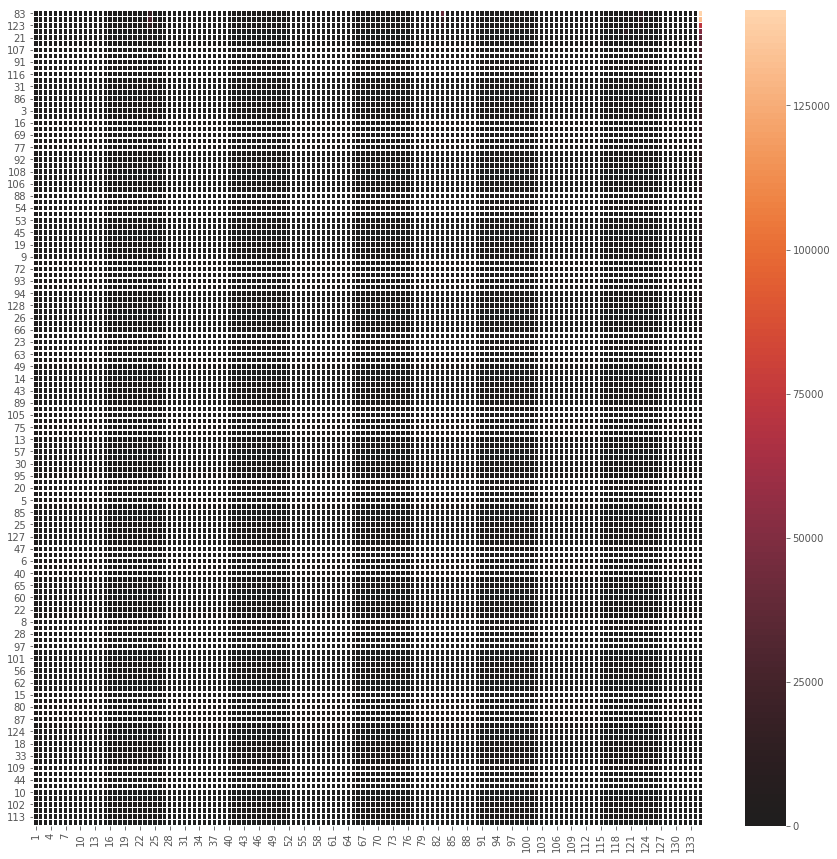

In [50]:
fig, ax = plt.subplots(figsize=(15,15))

sbn.heatmap(comp_df, ax=ax,vmin=0,center=0, annot=False, linewidths=.5)

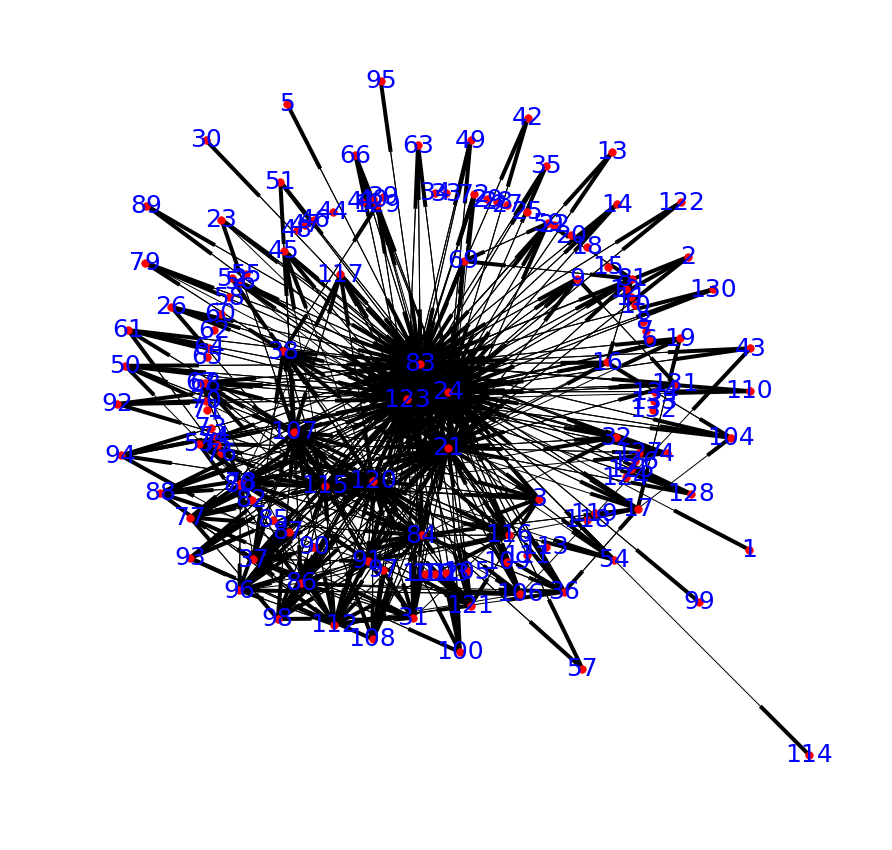

In [61]:
g = nx.DiGraph()

g.add_nodes_from(final.keys())

for rec in final:
    for a in final[rec]:
        if final[rec][a] > 250:
            g.add_edge(rec, a)
            
g.edges(data=True)
gfig, gax = plt.subplots(figsize=(15,15))
nx.draw(g,nx.kamada_kawai_layout(g),ax=gax,with_labels=True,font_size=25,node_size=60,font_color='blue')

In [62]:
import pprint
bests = comp_df.values.tolist()[:10][:10]
for i in range(len(bests)):
    bests[i][i] = 0.0
pprint.pprint(bests[:10][:10], width=1400)

[[0.0, 366.0, 689.0, 555.0, 290.0, 107.0, 209.0, 61.0, 902.0, 32.0, 28.0, 122.0, 274.0, 680.0, 111.0, 3634.0, 856.0, 50.0, 1024.0, 112.0, 3687.0, 44.0, 264.0, 18209.0, 162.0, 378.0, 27.0, 41.0, 168.0, 404.0, 1236.0, 1007.0, 51.0, 206.0, 920.0, 869.0, 989.0, 714.0, 183.0, 70.0, 71.0, 315.0, 416.0, 12.0, 473.0, 28.0, 105.0, 83.0, 828.0, 329.0, 404.0, 465.0, 826.0, 499.0, 12.0, 48.0, 228.0, 118.0, 1304.0, 63.0, 325.0, 46.0, 792.0, 130.0, 80.0, 850.0, 1309.0, 95.0, 1543.0, 68.0, 72.0, 859.0, 18.0, 192.0, 160.0, 50.0, 565.0, 948.0, 382.0, 25.0, 1769.0, 17.0, 40783.0, 2032.0, 103.0, 1856.0, 28.0, 692.0, 414.0, 38.0, 2034.0, 530.0, 539.0, 418.0, 282.0, 1297.0, 55.0, 773.0, 234.0, 755.0, 36.0, 15.0, 23.0, 1031.0, 232.0, 1099.0, 1592.0, 1058.0, 18.0, 529.0, 46.0, 1789.0, 6.0, 159.0, 1720.0, 2188.0, 815.0, 14.0, 49.0, 3147.0, 683.0, 556.0, 12087.0, 20.0, 38.0, 35.0, 59.0, 798.0, 556.0, 350.0, 1044.0, 17.0, 22.0, 12.0, 141527.0],
 [213.0, 0.0, 1125.0, 505.0, 138.0, 97.0, 108.0, 109.0, 531.0, 23.0

In [63]:
%load_ext py_d3

In [64]:

%%d3 4.11.0

<style>

.group-tick line {
  stroke: #000;
}

.ribbons {
  fill-opacity: 0.67;
}
</style>

<svg width=960 height=960></svg>

<script>
var matrix = [[0.0, 18209.0, 12087.0, 3147.0, 3687.0, 1720.0, 1592.0, 2032.0, 2034.0, 1789.0, 2188.0, 989.0, 1236.0, 948.0, 1856.0, 714.0, 689.0, 1297.0, 3634.0, 683.0, 1543.0, 1309.0, 565.0, 773.0, 530.0, 1769.0, 1058.0, 856.0, 1099.0, 815.0, 692.0, 1304.0, 499.0, 1007.0, 826.0, 1044.0, 473.0, 869.0, 1024.0, 555.0, 902.0, 325.0, 859.0, 465.0, 539.0, 1031.0, 418.0, 556.0, 798.0, 755.0, 378.0, 382.0, 850.0, 329.0, 264.0, 350.0, 792.0, 159.0, 828.0, 404.0, 680.0, 920.0, 416.0, 529.0, 414.0, 315.0, 232.0, 130.0, 160.0, 234.0, 274.0, 366.0, 228.0, 192.0, 404.0, 206.0, 282.0, 83.0, 112.0, 556.0, 290.0, 168.0, 103.0, 168.0, 162.0, 71.0, 59.0, 46.0, 105.0, 72.0, 107.0, 122.0, 70.0, 27.0, 80.0, 118.0, 63.0, 209.0, 44.0, 38.0, 61.0, 28.0, 41.0, 68.0, 55.0, 38.0, 36.0, 183.0, 48.0, 35.0, 46.0, 28.0, 111.0, 49.0, 25.0, 22.0, 28.0, 50.0, 20.0, 18.0, 50.0, 95.0, 51.0, 12.0, 18.0, 23.0, 12.0, 14.0, 32.0, 12.0, 15.0, 17.0, 6.0, 17.0],
 [16344.0, 0.0, 11124.0, 5329.0, 3058.0, 3256.0, 1900.0, 4412.0, 3045.0, 2304.0, 2114.0, 1287.0, 1992.0, 1257.0, 2372.0, 841.0, 1125.0, 1267.0, 1798.0, 1123.0, 782.0, 1169.0, 805.0, 1161.0, 713.0, 645.0, 928.0, 745.0, 846.0, 982.0, 910.0, 738.0, 622.0, 2428.0, 1118.0, 581.0, 569.0, 737.0, 729.0, 505.0, 531.0, 511.0, 539.0, 719.0, 773.0, 478.0, 605.0, 516.0, 631.0, 600.0, 570.0, 404.0, 420.0, 510.0, 503.0, 492.0, 392.0, 184.0, 424.0, 288.0, 367.0, 443.0, 309.0, 286.0, 243.0, 254.0, 229.0, 227.0, 169.0, 274.0, 313.0, 275.0, 315.0, 190.0, 208.0, 211.0, 215.0, 153.0, 139.0, 252.0, 138.0, 198.0, 130.0, 213.0, 121.0, 99.0, 62.0, 84.0, 137.0, 105.0, 97.0, 83.0, 64.0, 40.0, 102.0, 95.0, 59.0, 108.0, 35.0, 85.0, 109.0, 46.0, 41.0, 76.0, 45.0, 41.0, 22.0, 145.0, 63.0, 48.0, 31.0, 37.0, 70.0, 52.0, 18.0, 40.0, 49.0, 32.0, 44.0, 21.0, 95.0, 59.0, 45.0, 20.0, 33.0, 25.0, 20.0, 22.0, 23.0, 5.0, 24.0, 24.0, 25.0, 11.0],
 [11711.0, 12371.0, 0.0, 2312.0, 2131.0, 1285.0, 1131.0, 1448.0, 1323.0, 1040.0, 1523.0, 694.0, 945.0, 727.0, 1162.0, 528.0, 550.0, 901.0, 1031.0, 504.0, 560.0, 1095.0, 404.0, 574.0, 334.0, 565.0, 528.0, 364.0, 562.0, 547.0, 482.0, 430.0, 333.0, 1115.0, 521.0, 465.0, 302.0, 415.0, 425.0, 337.0, 455.0, 269.0, 379.0, 337.0, 378.0, 323.0, 272.0, 302.0, 394.0, 392.0, 268.0, 268.0, 281.0, 284.0, 269.0, 259.0, 292.0, 115.0, 382.0, 186.0, 285.0, 350.0, 205.0, 222.0, 313.0, 208.0, 150.0, 96.0, 117.0, 131.0, 204.0, 184.0, 174.0, 98.0, 151.0, 143.0, 130.0, 89.0, 84.0, 200.0, 108.0, 91.0, 75.0, 165.0, 96.0, 64.0, 27.0, 43.0, 85.0, 41.0, 46.0, 66.0, 35.0, 18.0, 60.0, 59.0, 35.0, 83.0, 35.0, 39.0, 57.0, 25.0, 20.0, 49.0, 27.0, 30.0, 16.0, 80.0, 33.0, 23.0, 21.0, 19.0, 50.0, 28.0, 26.0, 21.0, 26.0, 28.0, 19.0, 17.0, 39.0, 39.0, 24.0, 13.0, 11.0, 15.0, 8.0, 9.0, 10.0, 5.0, 12.0, 14.0, 12.0, 5.0],
 [3010.0, 5350.0, 2181.0, 0.0, 1397.0, 980.0, 714.0, 1933.0, 1108.0, 803.0, 590.0, 540.0, 789.0, 496.0, 776.0, 441.0, 510.0, 497.0, 297.0, 554.0, 274.0, 407.0, 311.0, 427.0, 370.0, 201.0, 444.0, 221.0, 313.0, 341.0, 310.0, 234.0, 244.0, 216.0, 473.0, 209.0, 226.0, 267.0, 167.0, 236.0, 189.0, 208.0, 177.0, 329.0, 340.0, 151.0, 226.0, 200.0, 187.0, 403.0, 242.0, 201.0, 136.0, 216.0, 191.0, 209.0, 135.0, 97.0, 142.0, 114.0, 133.0, 133.0, 116.0, 100.0, 72.0, 77.0, 85.0, 102.0, 80.0, 144.0, 108.0, 81.0, 257.0, 63.0, 61.0, 74.0, 66.0, 104.0, 50.0, 60.0, 45.0, 62.0, 44.0, 73.0, 58.0, 52.0, 32.0, 31.0, 43.0, 66.0, 47.0, 30.0, 31.0, 20.0, 55.0, 45.0, 24.0, 24.0, 29.0, 32.0, 27.0, 21.0, 16.0, 37.0, 18.0, 21.0, 12.0, 28.0, 19.0, 16.0, 14.0, 10.0, 19.0, 19.0, 11.0, 11.0, 9.0, 12.0, 6.0, 10.0, 18.0, 17.0, 14.0, 13.0, 12.0, 8.0, 6.0, 6.0, 1.0, 3.0, 6.0, 7.0, 8.0, 5.0],
 [3717.0, 3448.0, 2199.0, 1474.0, 0.0, 641.0, 825.0, 938.0, 588.0, 932.0, 486.0, 425.0, 410.0, 712.0, 732.0, 334.0, 296.0, 1237.0, 413.0, 373.0, 339.0, 448.0, 278.0, 303.0, 212.0, 420.0, 816.0, 249.0, 440.0, 313.0, 280.0, 389.0, 235.0, 285.0, 427.0, 524.0, 206.0, 359.0, 238.0, 298.0, 594.0, 211.0, 250.0, 276.0, 309.0, 203.0, 150.0, 238.0, 579.0, 171.0, 154.0, 197.0, 126.0, 160.0, 152.0, 178.0, 124.0, 78.0, 185.0, 190.0, 134.0, 149.0, 214.0, 175.0, 164.0, 131.0, 139.0, 82.0, 71.0, 125.0, 115.0, 262.0, 88.0, 72.0, 167.0, 98.0, 91.0, 73.0, 41.0, 112.0, 99.0, 50.0, 41.0, 78.0, 52.0, 36.0, 25.0, 20.0, 24.0, 50.0, 28.0, 62.0, 34.0, 21.0, 30.0, 68.0, 18.0, 49.0, 15.0, 39.0, 18.0, 20.0, 16.0, 10.0, 21.0, 21.0, 16.0, 19.0, 23.0, 13.0, 25.0, 11.0, 21.0, 18.0, 15.0, 10.0, 11.0, 15.0, 12.0, 17.0, 11.0, 12.0, 19.0, 6.0, 5.0, 7.0, 7.0, 9.0, 11.0, 9.0, 8.0, 7.0, 6.0, 2.0],
 [1547.0, 2897.0, 1110.0, 902.0, 570.0, 0.0, 580.0, 743.0, 613.0, 380.0, 256.0, 373.0, 677.0, 334.0, 389.0, 253.0, 344.0, 248.0, 152.0, 235.0, 159.0, 268.0, 935.0, 492.0, 139.0, 109.0, 190.0, 154.0, 188.0, 210.0, 196.0, 98.0, 350.0, 243.0, 278.0, 116.0, 249.0, 147.0, 152.0, 109.0, 115.0, 167.0, 145.0, 163.0, 160.0, 105.0, 301.0, 108.0, 93.0, 201.0, 265.0, 122.0, 77.0, 140.0, 171.0, 93.0, 63.0, 122.0, 84.0, 73.0, 57.0, 68.0, 74.0, 76.0, 63.0, 54.0, 45.0, 195.0, 101.0, 54.0, 73.0, 60.0, 60.0, 62.0, 30.0, 43.0, 54.0, 56.0, 58.0, 34.0, 33.0, 30.0, 58.0, 46.0, 55.0, 85.0, 38.0, 49.0, 30.0, 24.0, 33.0, 17.0, 35.0, 42.0, 30.0, 22.0, 34.0, 23.0, 29.0, 38.0, 25.0, 28.0, 15.0, 31.0, 15.0, 25.0, 12.0, 14.0, 32.0, 21.0, 26.0, 25.0, 12.0, 11.0, 18.0, 23.0, 24.0, 6.0, 45.0, 17.0, 20.0, 5.0, 14.0, 12.0, 12.0, 7.0, 15.0, 12.0, 12.0, 7.0, 2.0, 8.0, 7.0, 4.0],
 [1648.0, 2225.0, 1185.0, 882.0, 887.0, 696.0, 0.0, 529.0, 416.0, 501.0, 301.0, 496.0, 456.0, 811.0, 290.0, 336.0, 497.0, 379.0, 142.0, 417.0, 201.0, 1137.0, 457.0, 345.0, 141.0, 140.0, 308.0, 123.0, 237.0, 335.0, 218.0, 191.0, 202.0, 173.0, 226.0, 169.0, 456.0, 150.0, 124.0, 235.0, 150.0, 448.0, 173.0, 209.0, 198.0, 104.0, 192.0, 231.0, 217.0, 145.0, 187.0, 195.0, 118.0, 344.0, 349.0, 114.0, 92.0, 77.0, 70.0, 439.0, 65.0, 55.0, 126.0, 97.0, 104.0, 96.0, 102.0, 111.0, 61.0, 90.0, 98.0, 72.0, 85.0, 58.0, 61.0, 52.0, 41.0, 84.0, 41.0, 35.0, 42.0, 41.0, 42.0, 47.0, 44.0, 37.0, 32.0, 51.0, 28.0, 35.0, 25.0, 25.0, 20.0, 44.0, 20.0, 31.0, 33.0, 20.0, 19.0, 76.0, 42.0, 23.0, 19.0, 18.0, 21.0, 18.0, 9.0, 8.0, 16.0, 18.0, 16.0, 20.0, 13.0, 18.0, 19.0, 11.0, 8.0, 11.0, 21.0, 17.0, 22.0, 6.0, 6.0, 7.0, 9.0, 9.0, 4.0, 14.0, 5.0, 7.0, 6.0, 7.0, 4.0, 5.0],
 [1737.0, 3573.0, 1228.0, 1429.0, 842.0, 724.0, 428.0, 0.0, 735.0, 626.0, 287.0, 319.0, 556.0, 272.0, 835.0, 213.0, 231.0, 283.0, 163.0, 517.0, 183.0, 200.0, 309.0, 290.0, 184.0, 129.0, 286.0, 266.0, 220.0, 163.0, 196.0, 111.0, 182.0, 244.0, 578.0, 160.0, 142.0, 295.0, 113.0, 197.0, 114.0, 150.0, 118.0, 200.0, 220.0, 93.0, 157.0, 126.0, 120.0, 89.0, 163.0, 130.0, 67.0, 128.0, 76.0, 115.0, 57.0, 70.0, 90.0, 56.0, 73.0, 80.0, 86.0, 44.0, 58.0, 39.0, 96.0, 84.0, 77.0, 75.0, 76.0, 73.0, 68.0, 49.0, 22.0, 53.0, 38.0, 44.0, 36.0, 45.0, 42.0, 45.0, 31.0, 61.0, 21.0, 36.0, 25.0, 20.0, 19.0, 28.0, 31.0, 25.0, 30.0, 21.0, 23.0, 18.0, 19.0, 22.0, 20.0, 21.0, 27.0, 13.0, 10.0, 22.0, 16.0, 17.0, 8.0, 13.0, 24.0, 21.0, 14.0, 12.0, 9.0, 12.0, 12.0, 13.0, 7.0, 7.0, 12.0, 6.0, 13.0, 8.0, 4.0, 9.0, 6.0, 11.0, 9.0, 8.0, 4.0, 6.0, 7.0, 5.0, 3.0, 1.0],
 [1897.0, 2865.0, 1193.0, 965.0, 563.0, 633.0, 351.0, 939.0, 0.0, 390.0, 436.0, 336.0, 462.0, 214.0, 536.0, 179.0, 217.0, 226.0, 188.0, 425.0, 194.0, 245.0, 126.0, 253.0, 101.0, 155.0, 169.0, 237.0, 168.0, 200.0, 229.0, 133.0, 165.0, 117.0, 347.0, 113.0, 127.0, 175.0, 153.0, 93.0, 109.0, 111.0, 136.0, 150.0, 164.0, 130.0, 141.0, 97.0, 98.0, 138.0, 170.0, 97.0, 141.0, 85.0, 85.0, 163.0, 94.0, 51.0, 69.0, 48.0, 133.0, 74.0, 50.0, 60.0, 49.0, 95.0, 50.0, 53.0, 38.0, 45.0, 46.0, 42.0, 101.0, 49.0, 30.0, 34.0, 38.0, 32.0, 35.0, 33.0, 24.0, 52.0, 23.0, 36.0, 40.0, 24.0, 15.0, 12.0, 34.0, 31.0, 52.0, 17.0, 19.0, 10.0, 45.0, 45.0, 15.0, 11.0, 14.0, 20.0, 24.0, 10.0, 12.0, 26.0, 12.0, 16.0, 11.0, 13.0, 10.0, 9.0, 5.0, 9.0, 19.0, 8.0, 6.0, 9.0, 4.0, 13.0, 2.0, 5.0, 12.0, 15.0, 6.0, 5.0, 6.0, 5.0, 4.0, 6.0, 4.0, 3.0, 2.0, 0.0, 2.0, 3.0],
 [1605.0, 2391.0, 1007.0, 784.0, 761.0, 481.0, 447.0, 908.0, 450.0, 0.0, 268.0, 299.0, 382.0, 307.0, 569.0, 244.0, 190.0, 560.0, 173.0, 296.0, 168.0, 253.0, 244.0, 197.0, 135.0, 105.0, 219.0, 142.0, 273.0, 119.0, 356.0, 136.0, 184.0, 175.0, 238.0, 153.0, 124.0, 215.0, 118.0, 121.0, 156.0, 136.0, 163.0, 178.0, 322.0, 89.0, 106.0, 162.0, 177.0, 88.0, 150.0, 111.0, 69.0, 81.0, 97.0, 99.0, 78.0, 53.0, 68.0, 60.0, 78.0, 73.0, 108.0, 75.0, 64.0, 67.0, 77.0, 75.0, 49.0, 74.0, 84.0, 79.0, 66.0, 47.0, 32.0, 45.0, 63.0, 46.0, 28.0, 35.0, 36.0, 36.0, 19.0, 55.0, 26.0, 29.0, 22.0, 15.0, 14.0, 30.0, 24.0, 28.0, 15.0, 22.0, 18.0, 67.0, 26.0, 21.0, 12.0, 16.0, 19.0, 12.0, 6.0, 12.0, 6.0, 14.0, 7.0, 11.0, 14.0, 15.0, 12.0, 7.0, 24.0, 9.0, 8.0, 12.0, 6.0, 14.0, 11.0, 7.0, 7.0, 10.0, 7.0, 6.0, 6.0, 10.0, 4.0, 11.0, 6.0, 9.0, 4.0, 2.0, 4.0, 1.0]]

;

var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height"),
    outerRadius = Math.min(width, height) * 0.5 - 40,
    innerRadius = outerRadius - 30;

var formatValue = d3.formatPrefix(",.0", 1e3);

var chord = d3.chord()
    .padAngle(0.05)
    .sortSubgroups(d3.descending);

var arc = d3.arc()
    .innerRadius(innerRadius)
    .outerRadius(outerRadius);

var ribbon = d3.ribbon()
    .radius(innerRadius);

var color = d3.scaleOrdinal()
    .domain(d3.range(4))
    .range(["#000000", "#FFDD89", "#957244", "#F26223"]);

var g = svg.append("g")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")")
    .datum(chord(matrix));

var group = g.append("g")
    .attr("class", "groups")
  .selectAll("g")
  .data(function(chords) { return chords.groups; })
  .enter().append("g");

group.append("path")
    .style("fill", function(d) { return color(d.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.index)).darker(); })
    .attr("d", arc);

var groupTick = group.selectAll(".group-tick")
  .data(function(d) { return groupTicks(d, 1e3); })
  .enter().append("g")
    .attr("class", "group-tick")
    .attr("transform", function(d) { return "rotate(" + (d.angle * 180 / Math.PI - 90) + ") translate(" + outerRadius + ",0)"; });

groupTick.append("line")
    .attr("x2", 6);

groupTick
  .filter(function(d) { return d.value % 5e3 === 0; })
  .append("text")
    .attr("x", 8)
    .attr("dy", ".35em")
    .attr("transform", function(d) { return d.angle > Math.PI ? "rotate(180) translate(-16)" : null; })
    .style("text-anchor", function(d) { return d.angle > Math.PI ? "end" : null; })
    .text(function(d) { return formatValue(d.value); });

g.append("g")
    .attr("class", "ribbons")
  .selectAll("path")
  .data(function(chords) { return chords; })
  .enter().append("path")
    .attr("d", ribbon)
    .style("fill", function(d) { return color(d.target.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.target.index)).darker(); });

// Returns an array of tick angles and values for a given group and step.
function groupTicks(d, step) {
  var k = (d.endAngle - d.startAngle) / d.value;
  return d3.range(0, d.value, step).map(function(value) {
    return {value: value, angle: value * k + d.startAngle};
  });
}

</script>